In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os.path as op
import glob
import matplotlib.pyplot as plt
import ast
# import moss
import csv
import random
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import os
from pandas import Timestamp
from datetime import timedelta
from sklearn.preprocessing import StandardScaler


In [2]:
home_dir = op.abspath('./')

data_files = glob.glob(op.join(home_dir,
                        'data',
                        '*.csv'))
sns.set_context('talk')

In [3]:
df_orig = pd.read_csv('pilot_TOTAL_TEST.csv')

participant_set = set(df_orig['participant'])

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/1289973476.py:1: DtypeWarning: Columns (254,255,256,257,258,259) have mixed types. Specify dtype option on import or set low_memory=False.
  df_orig = pd.read_csv('pilot_TOTAL_TEST.csv')


In [4]:
df_orig['validity_binary']

0        1
1        1
2        0
3        1
4        0
        ..
83695    0
83696    1
83697    1
83698    1
83699    1
Name: validity_binary, Length: 83700, dtype: int64

In [5]:
df = []
for sub in data_files:
    try:
        sub_df = pd.read_csv(sub)
        
        # Filter for participants in participant_set
        if any(sub_df['participant'].isin(participant_set)):
            # Filter for non-empty 'image_recall_response.keys' and reset the index
            data = sub_df.loc[sub_df['image_recall_response.keys'].notna()].reset_index(drop=True)
            df.append(data.copy())
    except Exception as e:
        print(f"Error processing file {sub}: {e}")
        
# Concatenate all filtered data into a single DataFrame
df = pd.concat(df, ignore_index=True)

# Get the count of unique participants
unique_participants_count = len(set(df['participant']))
print(unique_participants_count)

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-09_12h13.56.688.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-22_22h11.53.949.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-08-28_19h01.07.543.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-09-04_02h15.32.256.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2025-01-28_21h17.51.789.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-21_13h00.30.594.csv: No columns to parse from file
Error processing file /Users/lana/Deskto

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2025-01-29_19h13.31.303.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2025-01-22_18h51.55.974.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/168889_WM_Deepgen_2024-12-02_14h03.28.335.csv: 'image_recall_response.keys'
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-15_16h37.45.390.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-22_20h31.43.754.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-20_22h16.55.250.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psyc

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/166894_WM_Deepgen_2024-11-24_12h48.57.508.csv: 'image_recall_response.keys'
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-08-31_12h03.04.245.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2025-01-28_11h51.32.313.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2025-01-23_16h03.06.466.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-06-04_16h25.08.428.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-16_19h20.33.024.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psyc

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/130429_WM_Deepgen_2025-01-23_16h02.56.758.csv: 'image_recall_response.keys'
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-15_09h54.08.716.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-15_22h08.15.368.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-11-26_10h12.09.906.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/155275_WM_Deepgen_2024-11-28_11h53.04.091.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-09-03_15h18.28.526.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyE

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-06-04_16h33.05.173.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/155275_WM_Deepgen_2024-11-28_11h51.59.687.csv: 'image_recall_response.keys'
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2025-01-23_12h13.36.621.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-11-26_21h27.41.156.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/163060_WM_Deepgen_2024-06-04_16h54.59.554.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/155275_WM_Deepgen_2024-11-28_11h51.49.254.csv: 'image_recall_response.keys'
Error processing file /Users/lana/Desktop/psychoPyExperim

In [6]:
df_orig['Prioritized - Deprioritized IT Distractor Similarity'] 

0       -0.172037
1        0.325911
2       -0.971064
3        1.429577
4        0.952969
           ...   
83695   -0.172915
83696    0.484554
83697    1.452186
83698    1.127150
83699    1.459498
Name: Prioritized - Deprioritized IT Distractor Similarity, Length: 83700, dtype: float64

In [7]:
# df['it_sim_dis_unattend']

In [8]:
len(set(df['participant']))

273

In [9]:
df

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,concept_im1_y,concept_im2_y,key_resp_14.rt,key_resp_14.duration,key_resp_12.rt,key_resp_12.duration,trials_2.order,concept_root,concept_im1,concept_im2
0,NaN,NaN,157210,2024-10-18_18h29.32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,157210,2024-10-18_18h29.32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,157210,2024-10-18_18h29.32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,157210,2024-10-18_18h29.32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,157210,2024-10-18_18h29.32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66093,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66094,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66095,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66096,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_orig

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,mouse.clicked_name_first,mouse.clicked_name_last,resp_correct_within,Accuracy,mouse.time_last_within,analysis_rt,tested_memorability,untested_memorability,attended_memorability,unattended_memorability
0,NaN,NaN,116851,2024-10-12 15:22:21.820,WM_Deepgen,2024.1.5,Win32,59.52381,NaN,NaN,...,"""memoranda_stim""","""memoranda_stim""",0.827264,0.827264,2.134018,2.134018,0.759124,0.563380,0.759124,0.563380
1,NaN,NaN,116851,2024-10-12 15:22:21.820,WM_Deepgen,2024.1.5,Win32,59.52381,NaN,NaN,...,"""memoranda_stim""","""memoranda_stim""",0.827264,0.827264,1.002118,1.002118,0.786164,0.916667,0.786164,0.916667
2,NaN,NaN,116851,2024-10-12 15:22:21.820,WM_Deepgen,2024.1.5,Win32,59.52381,NaN,NaN,...,"""memoranda_stim""","""memoranda_stim""",0.827264,0.827264,1.764018,1.764018,0.827815,0.796875,0.796875,0.827815
3,NaN,NaN,116851,2024-10-12 15:22:21.820,WM_Deepgen,2024.1.5,Win32,59.52381,NaN,NaN,...,"""memoranda_stim""","""memoranda_stim""",0.827264,0.827264,1.651718,1.651718,0.770370,0.708333,0.770370,0.708333
4,NaN,NaN,116851,2024-10-12 15:22:21.820,WM_Deepgen,2024.1.5,Win32,59.52381,NaN,NaN,...,"""memoranda_stim""","""memoranda_stim""",0.827264,0.827264,1.985318,1.985318,0.864865,0.763359,0.763359,0.864865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83695,NaN,NaN,171304,2025-01-29 19:25:41.828,WM_Deepgen,2023.2.1,MacIntel,59.88024,NaN,NaN,...,"""memoranda_stim""","""memoranda_stim""",0.913931,0.913931,1.550766,1.550766,0.810606,0.700680,0.700680,0.810606
83696,NaN,NaN,171304,2025-01-29 19:25:41.828,WM_Deepgen,2023.2.1,MacIntel,59.88024,NaN,NaN,...,"""memoranda_stim""","""memoranda_stim""",0.913931,0.913931,2.200566,2.200566,0.779817,0.747059,0.779817,0.747059
83697,NaN,NaN,171304,2025-01-29 19:25:41.828,WM_Deepgen,2023.2.1,MacIntel,59.88024,NaN,NaN,...,"""distractor_im_2""","""distractor_im_2""",-0.086069,-0.086069,1.333766,1.333766,0.529851,0.717241,0.529851,0.717241
83698,NaN,NaN,171304,2025-01-29 19:25:41.828,WM_Deepgen,2023.2.1,MacIntel,59.88024,NaN,NaN,...,"""memoranda_stim""","""memoranda_stim""",0.913931,0.913931,1.533766,1.533766,0.777778,0.777778,0.777778,0.777778


In [11]:
# df_orig['image_recall_response_count']

In [12]:
combined_df = pd.concat([df, df_orig], ignore_index=True)


In [13]:
response_counts = combined_df.groupby('participant')['image_recall_response.keys'].count().reset_index()

response_counts = response_counts.rename(columns={'image_recall_response.keys': 'image_recall_response_count'})

print(response_counts)

     participant  image_recall_response_count
0         116851                          240
1         121021                          240
2         123262                          240
3         123790                          240
4         123985                          240
..           ...                          ...
270       170536                          238
271       170665                          240
272       171031                          239
273       171253                          238
274       171304                          240

[275 rows x 2 columns]


In [14]:
min_response_count = response_counts['image_recall_response_count'].min()
min_response_count

0

In [15]:
threshold = 250 * (2 / 3)

below_threshold_count = (response_counts['image_recall_response_count'] < threshold).sum()

print(f"The number of participants with image_recall_response.keys count below {threshold} is: {below_threshold_count}")

The number of participants with image_recall_response.keys count below 166.66666666666666 is: 3


In [16]:
combined_df['acc_recall'] = np.where(combined_df['ImagePath'].str.contains("foil", case=False, na=False), 0, 1)




/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/1974338098.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['acc_recall'] = np.where(combined_df['ImagePath'].str.contains("foil", case=False, na=False), 0, 1)


In [17]:
# combined_df['acc_recall']

In [18]:
combined_df['mem_answ'] = np.where(combined_df['image_recall_response.keys'].isin([1, 2]), 0,
                                   np.where(combined_df['image_recall_response.keys'].isin([3, 4]), 1, np.nan))


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/2647953418.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['mem_answ'] = np.where(combined_df['image_recall_response.keys'].isin([1, 2]), 0,


In [19]:
combined_df['mem_answ']

0         1.0
1         0.0
2         0.0
3         1.0
4         0.0
         ... 
149793    NaN
149794    NaN
149795    NaN
149796    NaN
149797    NaN
Name: mem_answ, Length: 149798, dtype: float64

In [20]:
combined_df['recall_answ'] = np.where(
    combined_df['mem_answ'].isna() | combined_df['acc_recall'].isna(), np.nan,
    np.where(
        (combined_df['mem_answ'] == 0) & (combined_df['acc_recall'] == 0) | 
        (combined_df['mem_answ'] == 1) & (combined_df['acc_recall'] == 1), 1, 0)
)

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/1958824526.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['recall_answ'] = np.where(


In [21]:
combined_df['recall_answ']

0         1.0
1         1.0
2         0.0
3         0.0
4         1.0
         ... 
149793    NaN
149794    NaN
149795    NaN
149796    NaN
149797    NaN
Name: recall_answ, Length: 149798, dtype: float64

In [22]:
# count_gt_120 = combined_df[combined_df['image_recall_response.rt'] > 10].shape[0]
# count_gt_120

In [23]:
combined_df = combined_df[combined_df['image_recall_response.rt'] <= 4]


In [24]:
recall_count_per_participant = combined_df.groupby('participant')['recall_answ'].sum().reset_index()

recall_count_per_participant = recall_count_per_participant.rename(columns={'recall_answ': 'recall_answ_count'})

print(recall_count_per_participant)

     participant  recall_answ_count
0         116851              128.0
1         121021              165.0
2         123262              136.0
3         123790              159.0
4         123985              150.0
..           ...                ...
268       170536              123.0
269       170665              156.0
270       171031              172.0
271       171253              133.0
272       171304              159.0

[273 rows x 2 columns]


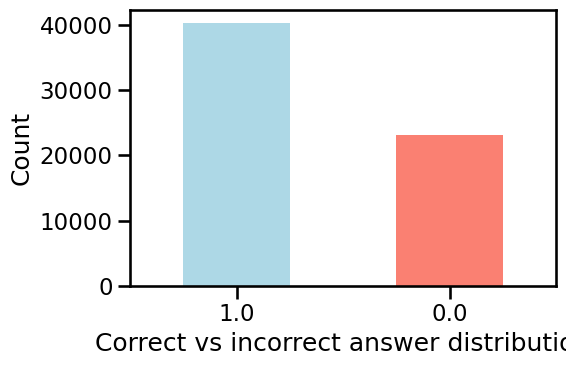

In [25]:
recall_counts = combined_df['recall_answ'].value_counts()

plt.figure(figsize=(6, 4))
recall_counts.plot(kind='bar', color=['lightblue', 'salmon'])
# plt.title('Counts of Recall Ans = 1 vs 0')
plt.xlabel('Correct vs incorrect answer distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()

In [26]:
answer_mapping = {1: 'Definitely not seen', 2: 'Probably not seen',
                  3: 'Probably seen', 4: 'Definitely seen'}

combined_df['Answer Labels'] = combined_df['image_recall_response.keys'].map(answer_mapping)


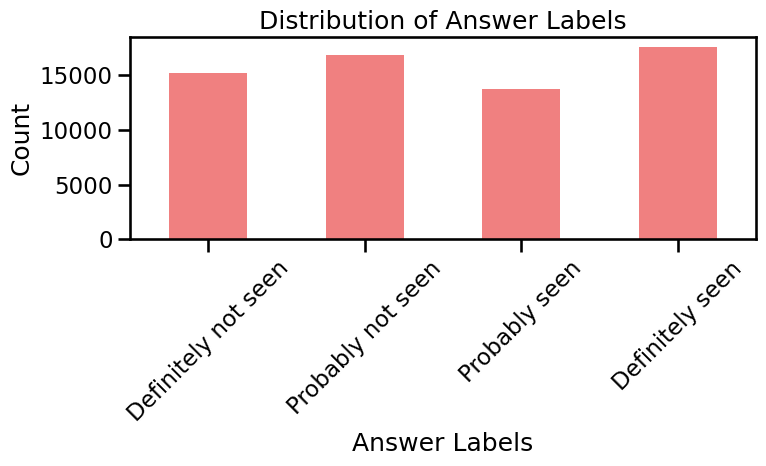

In [27]:
label_order = [
    'Definitely not seen', 
    'Probably not seen', 
    'Probably seen', 
    'Definitely seen'
]

# Count occurrences and sort by the defined order
answer_counts = combined_df['Answer Labels'].value_counts()
answer_counts = answer_counts.reindex(label_order)

plt.figure(figsize=(8, 5))
answer_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Answer Labels')
plt.xlabel('Answer Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

In [28]:
df = combined_df

In [29]:
correctLTM_df = df[df['recall_answ'] == 1]

correctLTM_df['Answer Labels'] = correctLTM_df['image_recall_response.keys'].map(answer_mapping)


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/2467276519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correctLTM_df['Answer Labels'] = correctLTM_df['image_recall_response.keys'].map(answer_mapping)


In [30]:
answer_counts_corr = correctLTM_df['Answer Labels'].value_counts()
answer_counts_corr = answer_counts_corr.reindex(label_order)

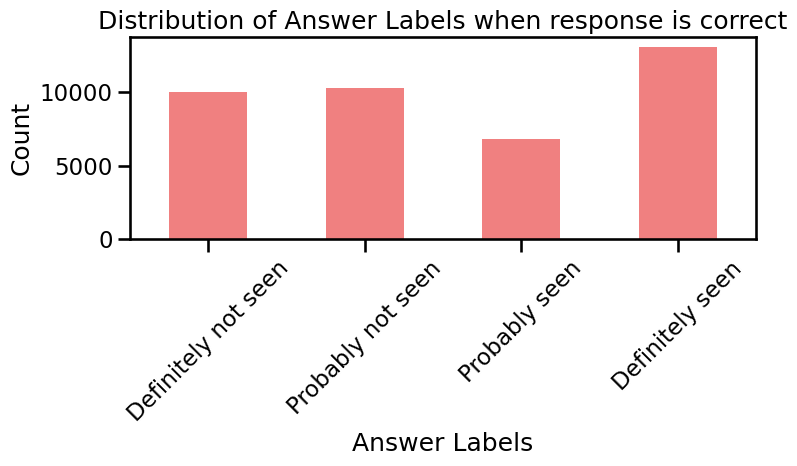

In [31]:
plt.figure(figsize=(8, 5))
answer_counts_corr.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Answer Labels when response is correct')
plt.xlabel('Answer Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

In [32]:
correctLTM_df['Answer Labels']

0            Definitely seen
1        Definitely not seen
4        Definitely not seen
5        Definitely not seen
6        Definitely not seen
                ...         
66088    Definitely not seen
66089    Definitely not seen
66092          Probably seen
66093          Probably seen
66097        Definitely seen
Name: Answer Labels, Length: 40244, dtype: object

In [33]:
wrongLTM_df = df[df['recall_answ'] == 0]

wrongLTM_df['Answer Labels'] = wrongLTM_df['image_recall_response.keys'].map(answer_mapping)


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/1338151430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrongLTM_df['Answer Labels'] = wrongLTM_df['image_recall_response.keys'].map(answer_mapping)


In [34]:
answer_counts_incorr = wrongLTM_df['Answer Labels'].value_counts()
answer_counts_incorr = answer_counts_incorr.reindex(label_order)

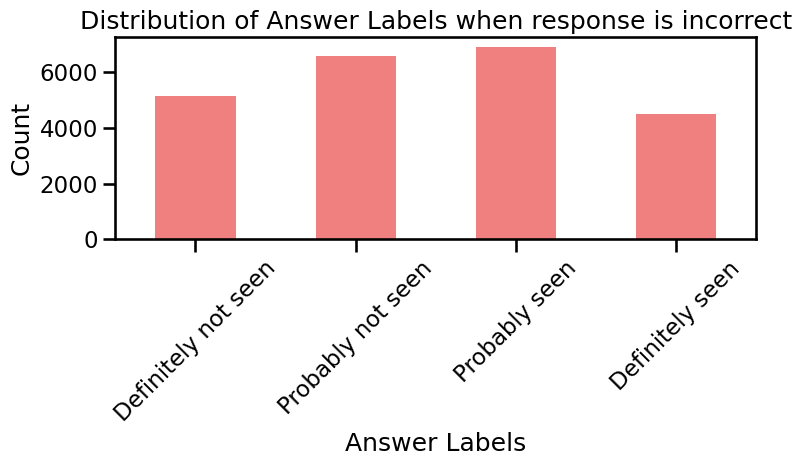

In [35]:
plt.figure(figsize=(8, 5))
answer_counts_incorr.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Answer Labels when response is incorrect')
plt.xlabel('Answer Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()



###for each of the categories plot the accuracy

In [36]:
# df = df[df['image_recall_response.rt'] <= 4]


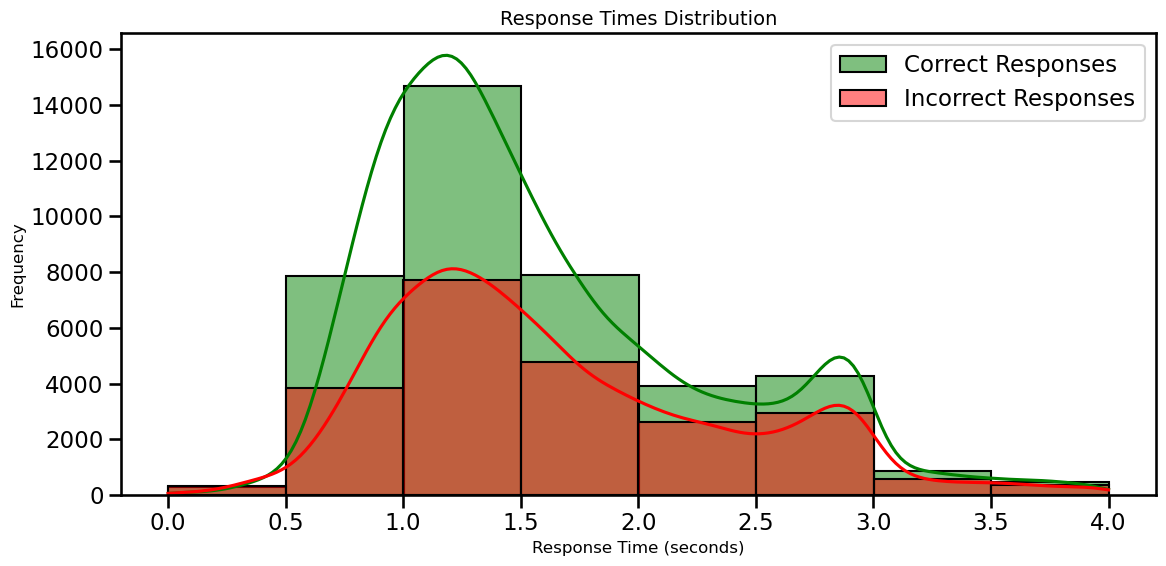

count    63403.000000
mean         1.607650
std          0.713237
min          0.000400
25%          1.080300
50%          1.420100
75%          2.010550
max          3.999800
Name: image_recall_response.rt, dtype: float64


In [37]:
df['recall_category'] = df['image_recall_response.keys'].map({
    1: 'Definitely not seen',
    2: 'Probably not seen',
    3: 'Probably seen',
    4: 'Definitely seen'
})

df['correct_recall'] = ((df['acc_recall'] == 1) & 
                              (df['Answer Labels'].isin(['Probably seen', 'Definitely seen']))) | \
                             ((df['acc_recall'] == 0) & 
                              (df['Answer Labels'].isin(['Definitely not seen', 'Probably not seen'])))



response_time_column = 'image_recall_response.rt'
correct_response_times = df[df['recall_answ'] == 1][response_time_column].dropna()
incorrect_response_times = df[df['recall_answ'] == 0][response_time_column].dropna()

# Get summary statistics for response times
response_time_stats = df[response_time_column].describe()

# Plotting the response times distribution
plt.figure(figsize=(12, 6))
sns.histplot(correct_response_times, color='green', kde=True, label='Correct Responses', binwidth=0.5)
sns.histplot(incorrect_response_times, color='red', kde=True, label='Incorrect Responses', binwidth=0.5)

plt.title('Response Times Distribution', fontsize=14)
plt.xlabel('Response Time (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Displaying summary statistics for response times
print(response_time_stats)


#####more fine graned bins

In [38]:
df['correct_recall']

0         True
1         True
2        False
3        False
4         True
         ...  
66090    False
66091    False
66092     True
66093     True
66097     True
Name: correct_recall, Length: 63403, dtype: bool

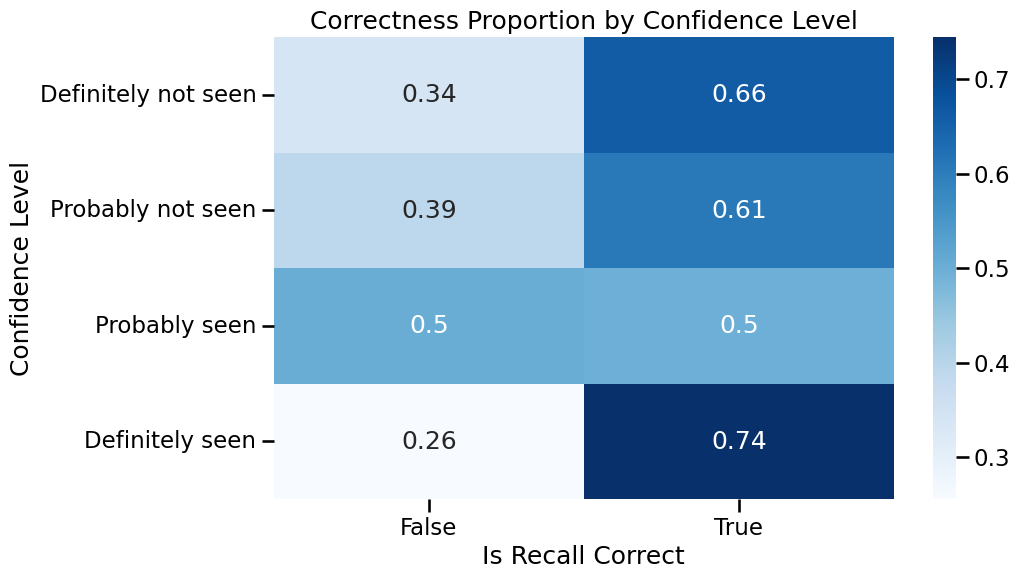

In [39]:
confidence_order = ['Definitely not seen', 'Probably not seen', 'Probably seen', 'Definitely seen']

confidence_mapping = {1: 'Definitely not seen', 2: 'Probably not seen', 
                                  3: 'Probably seen', 4: 'Definitely seen'}
df['confidence_level'] = df['image_recall_response.keys'].map(confidence_mapping)

confidence_correctness = pd.crosstab(df['confidence_level'], df['correct_recall'], normalize='index').reindex(index=confidence_order)

plt.figure(figsize=(10, 6))
sns.heatmap(confidence_correctness, annot=True, cmap='Blues')
plt.title('Correctness Proportion by Confidence Level')
plt.xlabel('Is Recall Correct')
plt.ylabel('Confidence Level')
plt.show()


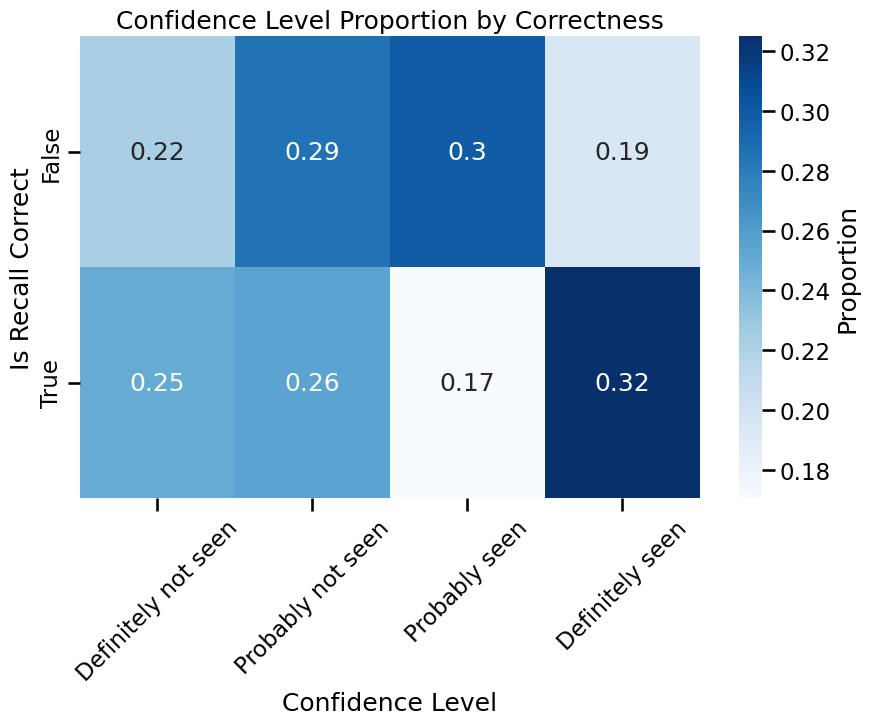

In [40]:
correctness_order = [False, True]  # Assuming 0 is 'not correct' and 1 is 'correct'

confidence_correctness_reversed = pd.crosstab(
    df['correct_recall'],
    df['confidence_level'],
    normalize='index'
).reindex(index=correctness_order, columns=confidence_order)

plt.figure(figsize=(10, 6))
sns.heatmap(confidence_correctness_reversed, annot=True, cmap='Blues', cbar_kws={'label': 'Proportion'})
plt.title('Confidence Level Proportion by Correctness')
plt.xlabel('Confidence Level')
plt.ylabel('Is Recall Correct')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

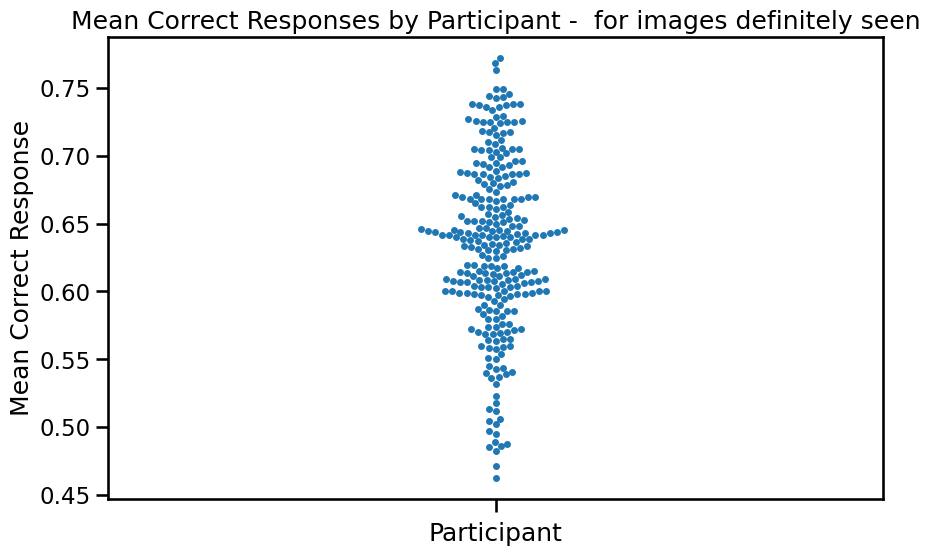

In [41]:
# Convert 'resp_correct' to numeric, coercing errors to NaN (non-numeric to NaN)
df['recall_answ'] = pd.to_numeric(df['recall_answ'], errors='coerce')

# Now, calculate the mean 'resp_correct' for each participant
mean_resp_correct = df.groupby('participant')['recall_answ'].mean().reset_index()

# Create the swarm plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as necessary
sns.swarmplot(y='recall_answ', data=mean_resp_correct)

plt.title('Mean Correct Responses by Participant -  for images definitely seen')
plt.xlabel('Participant')
plt.ylabel('Mean Correct Response')

# Show the plot
plt.show()

In [42]:
df

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,untested_memorability,attended_memorability,unattended_memorability,acc_recall,mem_answ,recall_answ,Answer Labels,recall_category,correct_recall,confidence_level
0,NaN,NaN,157210,2024-10-18_18h29.32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,NaN,NaN,NaN,1,1.0,1.0,Definitely seen,Definitely seen,True,Definitely seen
1,NaN,NaN,157210,2024-10-18_18h29.32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,NaN,NaN,NaN,0,0.0,1.0,Definitely not seen,Definitely not seen,True,Definitely not seen
2,NaN,NaN,157210,2024-10-18_18h29.32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,NaN,NaN,NaN,1,0.0,0.0,Probably not seen,Probably not seen,False,Probably not seen
3,NaN,NaN,157210,2024-10-18_18h29.32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,NaN,NaN,NaN,0,1.0,0.0,Probably seen,Probably seen,False,Probably seen
4,NaN,NaN,157210,2024-10-18_18h29.32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,NaN,NaN,NaN,0,0.0,1.0,Definitely not seen,Definitely not seen,True,Definitely not seen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66090,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,NaN,NaN,NaN,0,1.0,0.0,Definitely seen,Definitely seen,False,Definitely seen
66091,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,NaN,NaN,NaN,0,1.0,0.0,Probably seen,Probably seen,False,Probably seen
66092,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,NaN,NaN,NaN,1,1.0,1.0,Probably seen,Probably seen,True,Probably seen
66093,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,NaN,NaN,NaN,1,1.0,1.0,Probably seen,Probably seen,True,Probably seen


In [43]:
##acc_recall is 1 if the image was actually seen
##mem_answ is 1 if the said seen or probably seen
###recall_answ is 1 if these two are both 1 or both 0


### now I want, for the images where acc_recall == 1 to assign it, v2, etc
cols_to_copy = ['attend', 'reliability', 'validity', 'test_item']

# # Define the condition to match both `participant` and `ImagePath`
# condition = (df['acc_recall'] == 1) & (
#     ((df['participant'] == df_orig['participant']) & (df['ImagePath'] == df_orig['img1'])) |
#     ((df['participant'] == df_orig['participant']) & (df['ImagePath'] == df_orig['img2'])) |
#     ((df['participant'] == df_orig['participant']) & (df['ImagePath'] == df_orig['ping_im']))
# )

# # Apply the condition and copy values from `df_orig` to `df`
# df.loc[condition, cols_to_copy] = df_orig.loc[
#     ((df_orig['participant'] == df['participant']) & (df_orig['img1'] == df['ImagePath'])) |
#     ((df_orig['participant'] == df['participant']) & (df_orig['img2'] == df['ImagePath'])) |
#     ((df_orig['participant'] == df['participant']) & (df_orig['ping_im'] == df['ImagePath'])),
#     cols_to_copy
# ].values

In [44]:
df['participant']

0        157210
1        157210
2        157210
3        157210
4        157210
          ...  
66090    167431
66091    167431
66092    167431
66093    167431
66097    167431
Name: participant, Length: 63403, dtype: int64

In [45]:
df_orig['it_sim_dis_unattend']

0       -0.171473
1       -0.426118
2        0.394652
3       -0.395441
4       -0.432534
           ...   
83695    0.001603
83696   -0.048485
83697   -0.523769
83698   -0.464524
83699   -0.433038
Name: it_sim_dis_unattend, Length: 83700, dtype: float64

In [46]:
prc = []
for a in df['acc_recall']:
    if a == 1:
        prc.append('Correct')
    else:
        prc.append('Wrong')
df['Past Response Correctness'] = prc


In [47]:
df_orig['validity_binary']

0        1
1        1
2        0
3        1
4        0
        ..
83695    0
83696    1
83697    1
83698    1
83699    1
Name: validity_binary, Length: 83700, dtype: int64

In [48]:
def fill_non_nan_columns(row):
    # Locate matching rows in df_orig based on participant and image conditions
    matching_rows = df_orig[
        (df_orig['participant'] == row['participant']) &
        ((df_orig['img1'] == row['ImagePath']) | 
         (df_orig['img2'] == row['ImagePath']) | 
         (df_orig['ping_img'] == row['ImagePath']))
    ]
    
    # Copy non-NaN columns from the first matching row in df_orig if there's a match
    if not matching_rows.empty:
        match = matching_rows.iloc[0]
        for col in match.index:
            # Skip columns that identify rows (not to be copied over) and only copy non-NaN values
            if col not in ['participant'] and pd.notna(match[col]):
                row[col] = match[col]
    return row

# Apply the function to each row in df, only where 'acc_recall' == 1
df = df.apply(lambda row: fill_non_nan_columns(row) if row['acc_recall'] == 1 else row, axis=1)


In [49]:
# # Initialize an empty dataframe for df_ltm
# df_ltm = pd.DataFrame()

# def fill_non_nan_columns(row):
#     global df_ltm  # Use the global variable df_ltm
    
#     # Locate matching rows in df_orig based on participant and image conditions
#     matching_rows = df_orig[
#         (df_orig['participant'] == row['participant']) &
#         ((df_orig['img1'] == row['ImagePath']) | 
#          (df_orig['img2'] == row['ImagePath']) | 
#          (df_orig['ping_img'] == row['ImagePath']))
#     ]
    
# #     # Copy non-NaN columns from the first matching row in df_orig if there's a match
#     if not matching_rows.empty:
#         match = matching_rows.iloc[0]
# #         for col in match.index:
# #             # Skip columns that identify rows (not to be copied over) and only copy non-NaN values
# #             if col not in ['participant'] and pd.notna(match[col]):
# #                 row[col] = match[col]
        
#         # Add the matching row to df_ltm and create an additional column
#         matching_row = match.copy()
#         matching_row['image_recall_response.keys'] = row['image_recall_response.keys']  # Replace 'some_value' with the desired logic
#         matching_row['acc_recall'] = row['acc_recall']  # Replace 'some_value' with the desired logic
#         matching_row['recall_answ'] = row['recall_answ']  # Replace 'some_value' with the desired logic
#         matching_row['mem_answ'] = row['mem_answ']  # Replace 'some_value' with the desired logic
#         matching_row['Answer Labels'] = row['Answer Labels']  # Replace 'some_value' with the desired logic
#         df_ltm = pd.concat([df_ltm, matching_row.to_frame().T], ignore_index=True)
#     'Answer Labels'
#     return row

# # Apply the function to each row in df, only where 'acc_recall' == 1
# df = df.apply(lambda row: fill_non_nan_columns(row) if row['acc_recall'] == 1 else row, axis=1)


In [50]:
# df_ltm.to_csv("df_ltm.csv", index=False)


In [51]:
df['validity_binary']

0        0.0
1        NaN
2        1.0
3        NaN
4        NaN
        ... 
66090    NaN
66091    NaN
66092    1.0
66093    0.0
66097    0.0
Name: validity_binary, Length: 63403, dtype: float64

In [52]:
def remove_unit_variance(df, col, unit, group=None, suffix="_within"):
    """Remove variance between sampling units.

    This is useful for plotting repeated-measures data using within-unit
    error bars.

    Parameters
    ----------
    df : DataFrame
        Input data. Will have a new column added.
    col : column name
        Column in dataframe with quantitative measure to modify.
    unit : column name
        Column in dataframe defining sampling units (e.g., subjects).
    group : column name(s), optional
        Columns defining groups to remove unit variance within.
    suffix : string, optional
        Suffix appended to ``col`` name to create new column.

    Returns
    -------
    df : DataFrame
        Returns modified dataframe.

    """
    new_col = col + suffix

    def demean(x):
        return x - x.mean()

    if group is None:
        new = df.groupby(unit)[col].transform(demean)
        new += df[col].mean()
        df.loc[:, new_col] = new
    else:
        df.loc[:, new_col] = np.nan
        for level, df_level in df.groupby(group):
            new = df_level.groupby(unit)[col].transform(demean)
            new += df_level[col].mean()
            df.loc[new.index, new_col] = new

    return df

In [53]:
df = remove_unit_variance(df,'mouse.time_last','participant')
df['analysis_rt'] = df['mouse.time_last_within']

In [54]:
palette = sns.color_palette("husl", n_colors=2)[::-1]  # Reverse the color order


In [55]:
df['Distractor V2 Similarity Preference'] = df['v2_prefers'] 
df['Distractor IT Similarity Preference'] = df['it_prefers']

column_params = {
    'v2': {'n_cats': 5, 'labels': ['Least Similar', '', ' ', '   ', 'Most Similar']},
    'it': {'n_cats': 5, 'labels': ['Least Similar', '', ' ', '   ', 'Most Similar']}
}

for label in ['it_sim_dis_attend', 'v2_sim_dis_attend', 'it_sim_dis_unattend', 'v2_sim_dis_unattend', 'it_sim_dis_diff', 'v2_sim_dis_diff', 'it_im1_im2', 'v2_im1_im2', 'it_sim_dis_test', 'v2_sim_dis_test', 'it_sim_dis_untest', 'v2_sim_dis_untest', 'it_sim_dis_diff_test', 'v2_sim_dis_diff_test', 'v2_sim_dis_diff_sq', 'it_sim_dis_diff_sq', 'v2_sim_dis_diff_test_sq','it_sim_dis_diff_test_sq']:
    
    if 'v2' in label:
        n_cats = column_params['v2']['n_cats']
        labels = column_params['v2']['labels']
    else:
        n_cats = column_params['it']['n_cats']
        labels = column_params['it']['labels']
    
    df[label + '_cat'] = pd.qcut(df[label], q=n_cats, labels=labels, duplicates='drop')


df['V2 Distractor Similarity\nto Prioritized Item'] = df['v2_sim_dis_attend_cat']
df['IT Distractor Similarity\nto Prioritized Item'] = df['it_sim_dis_attend_cat']
df['V2 Distractor Similarity\nto Deprioritized Item'] = df['v2_sim_dis_unattend_cat']
df['IT Distractor Similarity\nto Deprioritized Item'] = df['it_sim_dis_unattend_cat']
df['Prioritized - Deprioritized IT Distractor Similarity'] = df['it_sim_dis_diff_cat'] 
df['Prioritized - Deprioritized V2 Distractor Similarity'] = df['v2_sim_dis_diff_cat'] 
df['Prioritized - Deprioritized IT Distractor Similarity Squared'] = df['v2_sim_dis_diff_sq_cat'] 
df['Prioritized - Deprioritized V2 Distractor Similarity Squared'] = df['it_sim_dis_diff_sq_cat'] 


df['V2 Distractor Similarity\nto Tested Item'] = df['v2_sim_dis_test_cat']
df['IT Distractor Similarity\nto Tested Item'] = df['it_sim_dis_test_cat']
df['V2 Distractor Similarity\nto Untested Item'] = df['v2_sim_dis_untest_cat']
df['IT Distractor Similarity\nto Untested Item'] = df['it_sim_dis_untest_cat']
df['Tested - Untested IT Distractor Similarity'] = df['it_sim_dis_diff_test_cat'] 
df['Tested - Untested V2 Distractor Similarity'] = df['v2_sim_dis_diff_test_cat'] 
df['Tested - Untested IT Distractor Similarity Squared'] = df['v2_sim_dis_diff_test_sq_cat'] 
df['Tested - Untested V2 Distractor Similarity Squared'] = df['it_sim_dis_diff_test_sq_cat'] 


In [56]:
df['tested_item'] = df['Tested Item']
df['ret_rel'] = df['Retrocue Reliability']

In [57]:
# df_correct = df[df['resp_correct'] == 1]


In [58]:
df['it_sim_dis_diff'] = df['it_sim_dis_diff'] - np.mean(df['it_sim_dis_diff'])
df['v2_sim_dis_diff'] = df['v2_sim_dis_diff'] - np.mean(df['v2_sim_dis_diff'])

df['it_sim_dis_diff_test'] = df['it_sim_dis_diff_test'] - np.mean(df['it_sim_dis_diff_test'])
df['v2_sim_dis_diff_test'] = df['v2_sim_dis_diff_test'] - np.mean(df['v2_sim_dis_diff_test'])

df['it_sim_dis_diff_test_sq'] = [x**2 for x in df['it_sim_dis_diff_test']]
df['v2_sim_dis_diff_test_sq'] = [x**2 for x in df['v2_sim_dis_diff_test']]

df['it_sim_dis_diff_sq'] = [x**2 for x in df['it_sim_dis_diff']]
df['v2_sim_dis_diff_sq'] = [x**2 for x in df['v2_sim_dis_diff']]


df['it_sim_dis_diff_sq'] = df['it_sim_dis_diff_sq'] - np.mean(df['it_sim_dis_diff_sq'])
df['v2_sim_dis_diff_sq'] = df['v2_sim_dis_diff_sq'] - np.mean(df['v2_sim_dis_diff_sq'])

df['it_sim_dis_diff_test_sq'] = df['it_sim_dis_diff_test_sq'] - np.mean(df['it_sim_dis_diff_test_sq'])
df['v2_sim_dis_diff_test_sq'] = df['v2_sim_dis_diff_test_sq'] - np.mean(df['v2_sim_dis_diff_test_sq'])


df['IT_diff_binned'] = pd.qcut(df['it_sim_dis_diff'], 5, duplicates='drop')
df['V2_diff_binned'] = pd.qcut(df['v2_sim_dis_diff'], 5, duplicates='drop')
df['IT_diff_binned_sq'] = pd.qcut(df['it_sim_dis_diff_sq'], 5, duplicates='drop')
df['V2_diff_binned_sq'] = pd.qcut(df['v2_sim_dis_diff_sq'], 5, duplicates='drop')


df['IT_diff_binned_test'] = pd.qcut(df['it_sim_dis_diff_test'], 5, duplicates='drop')
df['V2_diff_binned_test'] = pd.qcut(df['v2_sim_dis_diff_test'], 5, duplicates='drop')
df['IT_diff_binned_test_sq'] = pd.qcut(df['it_sim_dis_diff_test_sq'], 5, duplicates='drop')
df['V2_diff_binned_test_sq'] = pd.qcut(df['v2_sim_dis_diff_test_sq'], 5, duplicates='drop')

def round_to_significant_figures(x, sig_figs=2):
    if x == 0:
        return 0
    else:
        return round(x, sig_figs - int(np.floor(np.log10(abs(x)))) - 1)


def process_interval(interval):
    # Round both bounds
    lower_rounded = round_to_significant_figures(interval.left)
    upper_rounded = round_to_significant_figures(interval.right)
    # Return a new interval with the rounded bounds
    return pd.Interval(lower_rounded, upper_rounded)

df['IT_diff_binned'] = df['IT_diff_binned'].apply(process_interval)
df['V2_diff_binned'] = df['V2_diff_binned'].apply(process_interval)
df['IT_diff_binned_sq'] = df['IT_diff_binned_sq'].apply(process_interval)
df['V2_diff_binned_sq'] = df['V2_diff_binned_sq'].apply(process_interval)

df['IT_diff_binned_test'] = df['IT_diff_binned_test'].apply(process_interval)
df['V2_diff_binned_test'] = df['V2_diff_binned_test'].apply(process_interval)
df['IT_diff_binned_test_sq'] = df['IT_diff_binned_test_sq'].apply(process_interval)
df['V2_diff_binned_test_sq'] = df['V2_diff_binned_test_sq'].apply(process_interval)

df['Prioritized - Deprioritized V2 Distractor Similarity Ranges'] = df['V2_diff_binned']
df['Prioritized - Deprioritized IT Distractor Similarity Ranges'] = df['IT_diff_binned']
df['Prioritized - Deprioritized V2 Distractor Similarity Squared Ranges'] = df['V2_diff_binned_sq']
df['Prioritized - Deprioritized IT Distractor Similarity Squared Ranges'] = df['IT_diff_binned_sq']

df['Tested - Untested V2 Distractor Similarity Ranges'] = df['V2_diff_binned_test']
df['Tested - Untested IT Distractor Similarity Ranges'] = df['IT_diff_binned_test']
df['Tested - Untested V2 Distractor Similarity Squared Ranges'] = df['V2_diff_binned_test_sq']
df['Tested - Untested IT Distractor Similarity Squared Ranges'] = df['IT_diff_binned_test_sq']

In [59]:
df['V2 Distractor Similarity to Tested Item'] = df['v2_sim_dis_test_z']
df['IT Distractor Similarity to Tested Item'] = df['it_sim_dis_test_z']
df['Tested - Untested V2 Distractor Similarity'] = df['v2_sim_dis_diff_test_z']
df['Tested - Untested IT Distractor Similarity'] = df['it_sim_dis_diff_test_z']


# df['V2 Distractor Similarity to LTM Item'] = df['v2_sim_dis_test_z']
# df['IT Distractor Similarity to LTM Item'] = df['it_sim_dis_test_z']
# df['LTM - NonLTM V2 Distractor Similarity'] = df['v2_sim_dis_diff_test_z']
# df['LTM - NonLTM IT Distractor Similarity'] = df['it_sim_dis_diff_test_z']

In [60]:
# Add a new column 'category' to df with all conditions
df['category'] = df.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img']
    else ('foil' if 'foil' in str(row['ImagePath']).lower()
          else ('tested' if ((row['ImagePath'] == row['img1'] and row['test_item'] == 'img1') or 
                             (row['ImagePath'] == row['img2'] and row['test_item'] == 'img2'))
                else 'not tested')),
    axis=1
)


In [61]:
# df_filtered['category']

In [62]:
df['mem_stim_type'] = df.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img']
    else  (('tested' if ((row['ImagePath'] == row['img1'] and row['test_item'] == 'img1') or 
                             (row['ImagePath'] == row['img2'] and row['test_item'] == 'img2'))
                else 'not tested')),
    axis=1
)


In [63]:
df['Tested'] = df['mem_stim_type']

In [64]:
df['Attend'] = df.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img']
    else 'foil' if (row['category']== 'foil')
    else 'attended' if ((row['ImagePath'] == row['img1'] and row['attend'] == 'img1') or 
                             (row['ImagePath'] == row['img2'] and row['attend'] == 'img2'))
    else 'not attended',
    axis=1
)

In [65]:
scaler = StandardScaler()


In [66]:
def calculate_ltm_reliability(row):
    if (row['category']== 'foil'):
        return 'foil'
    elif row['reliability'] > 0.7:
        return 'high'
    elif row['reliability'] < 0.7:
        return 'low'
    
    else:
        return None  # Optional: Default case, if needed

# Apply the function to the dataframe
df['Reliability'] = df.apply(calculate_ltm_reliability, axis=1)


In [67]:

df['reliability_binary'] = np.where(df['Reliability'] == 'low', -1 , 1)
df['tested_binary'] =  np.where(df['Tested'] == 'tested', -1 , 1)
df['priority_binary'] =  np.where(df['Tested Item'] == 'prioritized', -1 , 1)
df['reliability_binary_z'] = scaler.fit_transform(df[['reliability_binary']])
df['tested_binary_z'] = scaler.fit_transform(df[['tested_binary']])
df['priority_binary_z'] = scaler.fit_transform(df[['priority_binary']])



In [68]:
df_distractor = df[df['category'] == 'distractor']

In [69]:
df['attend_binary'] = np.where(df['Attend'] == 'attended', -1 , 1)
df['attend_binary_z'] = scaler.fit_transform(df[['attend_binary']])


In [70]:
df_filtered = df[(df['category'] == 'tested') | (df['category'] == 'not tested')]


In [71]:
df_filtered['Tested Item'] #just wm testedness

0        deprioritized
2          prioritized
16         prioritized
19       deprioritized
20         prioritized
             ...      
66080      prioritized
66083    deprioritized
66085      prioritized
66093    deprioritized
66097    deprioritized
Name: Tested Item, Length: 20517, dtype: object

In [72]:
df_filtered['Attend'] # if ltm was attended in wm

0        not attended
2        not attended
16       not attended
19           attended
20           attended
             ...     
66080    not attended
66083        attended
66085        attended
66093    not attended
66097    not attended
Name: Attend, Length: 20517, dtype: object

In [73]:
df_filtered['Tested'] # if ltm was tested in wm

0            tested
2        not tested
16       not tested
19       not tested
20           tested
            ...    
66080    not tested
66083    not tested
66085        tested
66093        tested
66097        tested
Name: Tested, Length: 20517, dtype: object

In [74]:
#if ltm item was not tested in wm we need to update it and v2
#'V2 Distractor Similarity to LTM Item'
#'IT Distractor Similarity to LTM Item'
#'LTM - NonLTM V2 Distractor Similarity'
#'LTM - NonLTM IT Distractor Similarity'


In [75]:
df_filtered['ImagePath']

0        ./stimuli/193_3.jpg
2        ./stimuli/219_2.jpg
16        ./stimuli/50_3.jpg
19       ./stimuli/238_3.jpg
20        ./stimuli/41_2.jpg
                ...         
66080    ./stimuli/294_2.jpg
66083      ./stimuli/1_3.jpg
66085    ./stimuli/195_2.jpg
66093    ./stimuli/141_2.jpg
66097     ./stimuli/67_2.jpg
Name: ImagePath, Length: 20517, dtype: object

In [76]:
# if df_filtered['Tested'] == 'not tested':
#     df_filtered['it_sim_dis_test'] = np.where(df_filtered['test_item'] == 'img1', df_filtered['IT_root_im1'], dataframe['IT_root_im2'])
#     df_filtered['v2_sim_dis_test'] = np.where(df_filtered['test_item'] == 'img1', df_filtered['V2_root_im1'], dataframe['V2_root_im2'])

    
    
df_filtered['it_ltm'] = df_filtered.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img'] else (
        row['IT_root_im1'] if (row['ImagePath'] == row['img1']) else (
            row['IT_root_im2'] if (row['ImagePath'] == row['img2'] ) else 
            'not tested'
        )
    ),
    axis=1
)
    
df_filtered['v2_ltm'] = df_filtered.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img'] else (
        row['V2_root_im1'] if (row['ImagePath'] == row['img1']) else (
            row['V2_root_im2'] if (row['ImagePath'] == row['img2'] ) else 
            'not tested'
        )
    ),
    axis=1
)

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/3728465708.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['it_ltm'] = df_filtered.apply(
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/3728465708.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['v2_ltm'] = df_filtered.apply(


In [77]:
    
df_filtered['it_ltm_diff'] = df_filtered.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img'] else (
        (row['IT_root_im1'] - row['IT_root_im2']) if (row['ImagePath'] == row['img1']) else (
        (row['IT_root_im2'] - row['IT_root_im1']) if (row['ImagePath'] == row['img2'] ) else 
            'not tested'
        )
    ),
    axis=1
)

    
df_filtered['v2_ltm_diff'] = df_filtered.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img'] else (
        (row['V2_root_im1'] - row['V2_root_im2']) if (row['ImagePath'] == row['img1']) else (
        (row['V2_root_im2'] - row['V2_root_im1']) if (row['ImagePath'] == row['img2'] ) else 
            'not tested'
        )
    ),
    axis=1
)




/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/1284417044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['it_ltm_diff'] = df_filtered.apply(
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/1284417044.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['v2_ltm_diff'] = df_filtered.apply(


In [78]:
column_params = {
    'v2': {'n_cats': 5, 'labels': ['Least Similar', '', ' ', '   ', 'Most Similar']},
    'it': {'n_cats': 5, 'labels': ['Least Similar', '', ' ', '   ', 'Most Similar']}
}

for label in ['it_ltm', 'v2_ltm', 'it_ltm_diff', 'v2_ltm_diff']:
    
    if 'v2' in label:
        n_cats = column_params['v2']['n_cats']
        labels = column_params['v2']['labels']
    else:
        n_cats = column_params['it']['n_cats']
        labels = column_params['it']['labels']
    
    df_filtered[label + '_cat'] = pd.qcut(df_filtered[label], q=n_cats, labels=labels, duplicates='drop')


df_filtered['V2 Distractor Similarity\nto LTM Item'] = df_filtered['v2_ltm_cat']
df_filtered['IT Distractor Similarity\nto LTM Item'] = df_filtered['it_ltm_cat']
df_filtered['LTM - NonLTM V2 Distractor Similarity Ranges'] =df_filtered['v2_ltm_diff_cat']
df_filtered['LTM - NonLTM IT Distractor Similarity Ranges'] =df_filtered['it_ltm_diff_cat']



df_filtered['v2_ltm'] = df_filtered['v2_ltm'] - np.mean(df_filtered['v2_ltm'])
df_filtered['it_ltm'] = df_filtered['it_ltm'] - np.mean(df_filtered['it_ltm'])
df_filtered['v2_ltm_diff'] = df_filtered['v2_ltm_diff'] - np.mean(df_filtered['v2_ltm_diff'])
df_filtered['it_ltm_diff'] = df_filtered['it_ltm_diff'] - np.mean(df_filtered['it_ltm_diff'])



df_filtered['v2_ltm_sq'] = [x**2 for x in df_filtered['v2_ltm']]
df_filtered['it_ltm_sq'] = [x**2 for x in df_filtered['it_ltm']]
df_filtered['v2_ltm_diff_sq'] = [x**2 for x in df_filtered['v2_ltm_diff']]
df_filtered['it_ltm_diff_sq'] = [x**2 for x in df_filtered['it_ltm_diff']]

df_filtered['v2_ltm_sq'] = df_filtered['v2_ltm_sq'] - np.mean(df_filtered['v2_ltm_sq'])
df_filtered['it_ltm_sq'] = df_filtered['it_ltm_sq'] - np.mean(df_filtered['it_ltm_sq'])
df_filtered['v2_ltm_diff_sq'] = df_filtered['v2_ltm_diff_sq'] - np.mean(df_filtered['v2_ltm_diff_sq'])
df_filtered['it_ltm_diff_sq'] = df_filtered['it_ltm_diff_sq'] - np.mean(df_filtered['it_ltm_diff_sq'])

scaler = StandardScaler()

df_filtered['v2_ltm_z'] = scaler.fit_transform(df_filtered[['v2_ltm']])
df_filtered['it_ltm_z'] = scaler.fit_transform(df_filtered[['it_ltm']])
df_filtered['v2_ltm_diff_z'] = scaler.fit_transform(df_filtered[['v2_ltm_diff']])
df_filtered['it_ltm_diff_z'] = scaler.fit_transform(df_filtered[['it_ltm_diff']])
df_filtered['v2_ltm_sq_z'] = scaler.fit_transform(df_filtered[['v2_ltm_sq']])
df_filtered['it_ltm_sq_z'] = scaler.fit_transform(df_filtered[['it_ltm_sq']])
df_filtered['v2_ltm_diff_sq_z'] = scaler.fit_transform(df_filtered[['v2_ltm_diff_sq']])
df_filtered['it_ltm_diff_sq_z'] = scaler.fit_transform(df_filtered[['it_ltm_diff_sq']])

# df['v2_ltm'] = df['v2_ltm'] - np.mean(df['v2_ltm'])
# df['it_ltm'] = df['it_ltm'] - np.mean(df['it_ltm'])
# df['v2_ltm_diff'] = df['v2_ltm_diff'] - np.mean(df['v2_ltm_diff'])
# df['it_ltm_diff'] = df['it_ltm_diff'] - np.mean(df['it_ltm_diff'])




/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/709857216.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[label + '_cat'] = pd.qcut(df_filtered[label], q=n_cats, labels=labels, duplicates='drop')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/709857216.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[label + '_cat'] = pd.qcut(df_filtered[label], q=n_cats, labels=labels, duplicates='drop')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipy

In [79]:
print(df_filtered[label].dtype)


float64


In [80]:
df_filtered['LTM - NonLTM V2 Distractor Similarity'] = df_filtered['v2_ltm_diff_z']
df_filtered['LTM - NonLTM IT Distractor Similarity'] = df_filtered['it_ltm_diff_z']

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/339811994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['LTM - NonLTM V2 Distractor Similarity'] = df_filtered['v2_ltm_diff_z']
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/339811994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['LTM - NonLTM IT Distractor Similarity'] = df_filtered['it_ltm_diff_z']


In [81]:
df_filtered['it_ltm_diff_sq_z']

0        0.277668
2        1.019537
16      -1.094278
19       1.239948
20      -1.133639
           ...   
66080    1.659270
66083   -1.180668
66085    1.702155
66093   -0.505597
66097    0.189503
Name: it_ltm_diff_sq_z, Length: 20517, dtype: float64

In [82]:
df_filtered['V2_root_im2']

0        0.210374
2        0.091650
16       0.069361
19       0.044260
20       0.039192
           ...   
66080    0.098212
66083    0.059349
66085    0.145103
66093    0.067509
66097    0.004508
Name: V2_root_im2, Length: 20517, dtype: float64

In [83]:
df_filtered['v2_ltm']

0        0.125670
2       -0.011790
16      -0.015343
19      -0.040445
20       0.032781
           ...   
66080   -0.059214
66083   -0.025355
66085   -0.039154
66093   -0.044750
66097    0.039611
Name: v2_ltm, Length: 20517, dtype: float64

In [84]:
df_distractor = df[df['category'] == 'distractor']


In [85]:
df_distractor

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,mem_stim_type,Tested,Attend,Reliability,tested_binary,priority_binary,tested_binary_z,priority_binary_z,attend_binary,attend_binary_z
33,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,distractor,distractor,distractor,high,1,-1,0.438701,-1.288311,1,0.439723
41,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,distractor,distractor,distractor,high,1,-1,0.438701,-1.288311,1,0.439723
71,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,distractor,distractor,distractor,low,1,-1,0.438701,-1.288311,1,0.439723
74,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,distractor,distractor,distractor,high,1,1,0.438701,0.776210,1,0.439723
78,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,distractor,distractor,distractor,low,1,-1,0.438701,-1.288311,1,0.439723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66074,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,distractor,distractor,distractor,high,1,1,0.438701,0.776210,1,0.439723
66081,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,distractor,distractor,distractor,low,1,1,0.438701,0.776210,1,0.439723
66086,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,distractor,distractor,distractor,low,1,-1,0.438701,-1.288311,1,0.439723
66087,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,distractor,distractor,distractor,low,1,-1,0.438701,-1.288311,1,0.439723


In [86]:
palette = sns.color_palette("husl", n_colors=2)[::-1]  # Reverse the color order


In [87]:
df_filtered['V2 Distractor Similarity\nto Tested Item']

0        Most Similar
2                    
16       Most Similar
19       Most Similar
20                   
             ...     
66080                
66083                
66085                
66093                
66097                
Name: V2 Distractor Similarity\nto Tested Item, Length: 20517, dtype: category
Categories (5, object): ['Least Similar' < '' < ' ' < '   ' < 'Most Similar']

In [88]:
df_filtered['V2 Distractor Similarity\nto LTM Item']

0         Most Similar
2                     
16                    
19                    
20                    
             ...      
66080    Least Similar
66083                 
66085                 
66093                 
66097                 
Name: V2 Distractor Similarity\nto LTM Item, Length: 20517, dtype: category
Categories (5, object): ['Least Similar' < '' < ' ' < '   ' < 'Most Similar']

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/3175656336.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(96.08554487179485, 0.5, 'Accuracy')

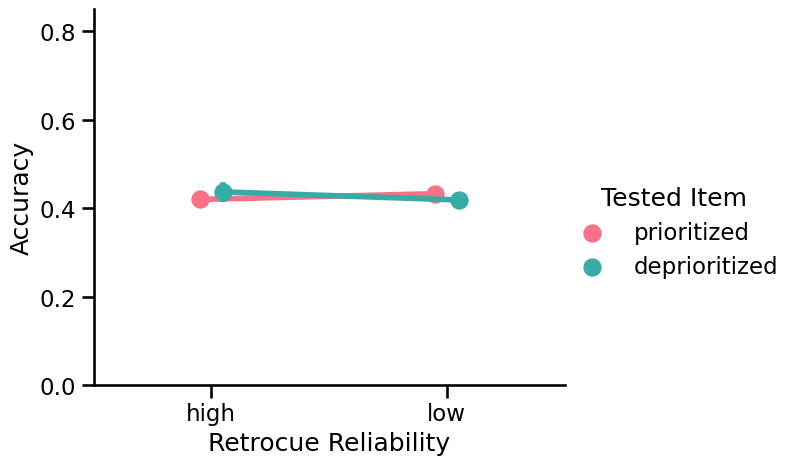

In [89]:
g = sns.catplot(
            x = 'Retrocue Reliability',
            y = 'recall_answ',
            ci = 68,
            hue = 'Tested Item',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
            palette = palette[::-1],  # Reverse the color order
            data = df_distractor)
g.set(ylim=(0, 0.85))
plt.ylabel('Accuracy')

In [90]:
df_filtered['V2 Distractor Similarity to LTM Item'] = df_filtered['v2_ltm_z']
df_filtered['IT Distractor Similarity to LTM Item'] = df_filtered['it_ltm_z']

df_filtered['V2 Distractor Similarity to LTM Item'] = df_filtered['v2_ltm_z']
df_filtered['IT Distractor Similarity to LTM Item'] = df_filtered['it_ltm_z']

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/1239251767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['V2 Distractor Similarity to LTM Item'] = df_filtered['v2_ltm_z']
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/1239251767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['IT Distractor Similarity to LTM Item'] = df_filtered['it_ltm_z']
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/1239251767.py:4: SettingWithCopyWar

In [91]:
df_filtered_corr = df_filtered[df_filtered['resp_correct'] == 1.0]

In [92]:
df_filtered_corr['category']

0            tested
2        not tested
16       not tested
19       not tested
20           tested
            ...    
66080    not tested
66083    not tested
66085        tested
66093        tested
66097        tested
Name: category, Length: 15403, dtype: object

In [93]:
df_filtered_corr['V2 Distractor Similarity\nto LTM Item']

0         Most Similar
2                     
16                    
19                    
20                    
             ...      
66080    Least Similar
66083                 
66085                 
66093                 
66097                 
Name: V2 Distractor Similarity\nto LTM Item, Length: 15403, dtype: category
Categories (5, object): ['Least Similar' < '' < ' ' < '   ' < 'Most Similar']

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/1387514932.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(6.819444444444445, 0.5, 'Accuracy')

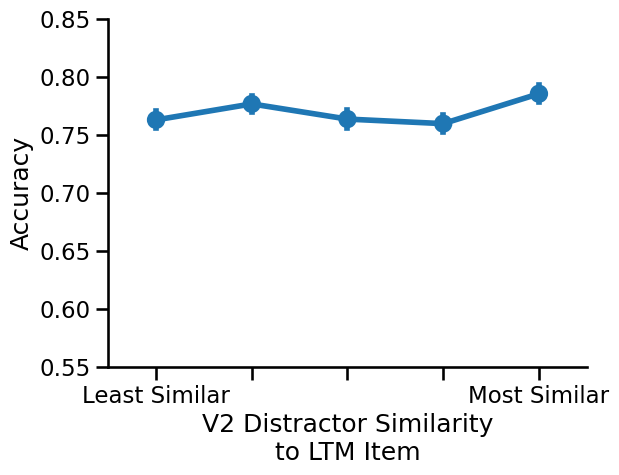

In [94]:
g = sns.catplot(
            x = 'V2 Distractor Similarity\nto LTM Item',
            y = 'recall_answ',
            ci = 68,
#             hue = 'Tested Item',
#             col = 'Retrocue Reliability',
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
            data = df_filtered_corr)
g.set(ylim=(0.55, 0.85))
plt.ylabel('Accuracy')



/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/230173215.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(6.819444444444445, 0.5, 'Accuracy')

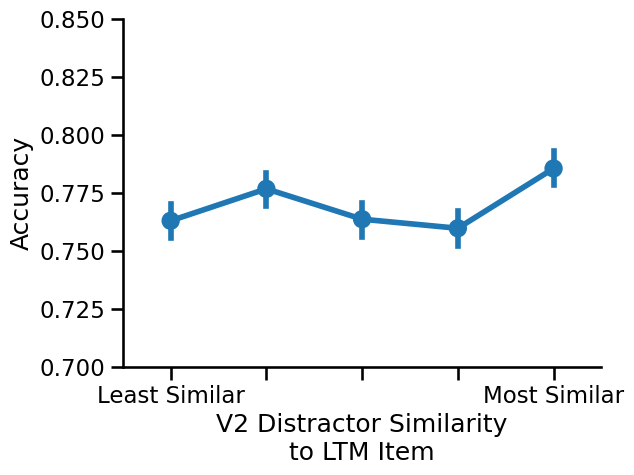

In [95]:
g = sns.catplot(
            x = 'V2 Distractor Similarity\nto LTM Item',
            y = 'recall_answ',
            ci = 68,
#             hue = 'Attend',
#             col = 'Tested',
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
            data = df_filtered_corr)
g.set(ylim=(0.7, 0.85))
plt.ylabel('Accuracy')

Text(6.819444444444445, 0.5, 'Accuracy')

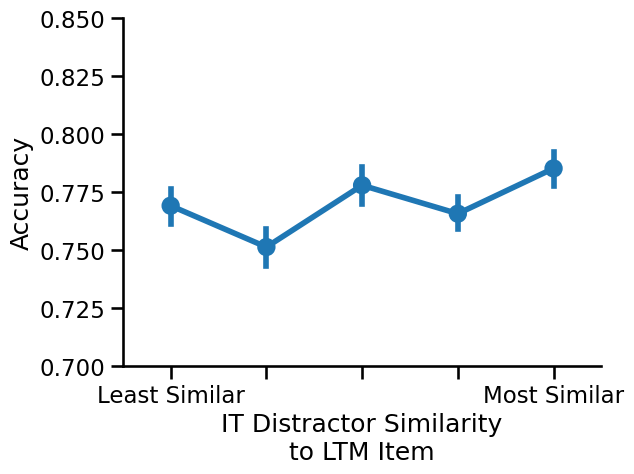

In [96]:
g = sns.catplot(
            x = 'IT Distractor Similarity\nto LTM Item',
            y = 'recall_answ',
            errorbar=('ci', 68),#             hue = 'Attend',
#             col = 'Tested',
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
            data = df_filtered_corr)
g.set(ylim=(0.7, 0.85))
plt.ylabel('Accuracy')

In [97]:

# plt.figure(figsize=(10, 6))
# sns.lmplot(
#     x='IT Distractor Similarity to LTM Item',
#     y='recall_answ',
#     hue = 'Tested Item',
#     row = 'Retrocue Reliability',
#     x_bins = 7,
#     order = 2,
#     ci = 68,
#     palette = palette[::-1],  # Reverse the color order
#     data=df_filtered_corr
# )
# plt.ylabel('Accuracy')

In [98]:

# plt.figure(figsize=(10, 6))
# sns.lmplot(
#     x='V2 Distractor Similarity to LTM Item',
#     y='recall_answ',
#     hue = 'Tested Item',
#     row = 'Retrocue Reliability',
#     x_bins = 7,
#     order = 2,
#     ci = 68,
#     palette = palette[::-1],  # Reverse the color order
#     data=df_filtered_corr
# )
# plt.ylabel('Accuracy')

In [99]:

# plt.figure(figsize=(10, 6))
# sns.lmplot(
#     x='LTM - NonLTM V2 Distractor Similarity',
#     y='recall_answ',
#     hue = 'Tested Item',
#     row = 'Retrocue Reliability',
#     x_bins = 7,
#     order = 2,
#     ci = 68,
#     palette = palette[::-1],  # Reverse the color order
#     data=df_filtered_corr
# )
# plt.ylabel('Accuracy')

In [100]:
# g = sns.lmplot(
#     x='LTM - NonLTM IT Distractor Similarity',
#     y='recall_answ',
#     hue='Tested Item',
# #     row='Retrocue Reliability', 
#     x_bins=20,  # Increase number of bins
#     height=4,   # Reduce height
#     aspect=1.5, # Control width/height ratio
#     order=2,
#     ci=68,
#     palette=palette[::-1],
#     data=df_filtered_corr
# )

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/2180204731.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(96.08554487179485, 0.5, 'Accuracy')

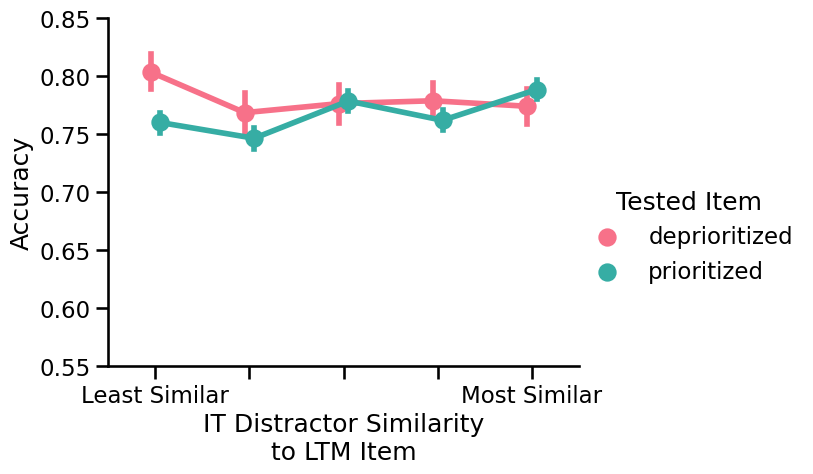

In [101]:
g = sns.catplot(
            x = 'IT Distractor Similarity\nto LTM Item',
            y = 'recall_answ',
            ci = 68,
            hue = 'Tested Item',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
            palette = palette[::-1],  # Reverse the color order
            data = df_filtered_corr)
g.set(ylim=(0.55, 0.85))
plt.ylabel('Accuracy')


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/385904337.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(830.4387926181889, 0.5, 'Accuracy')

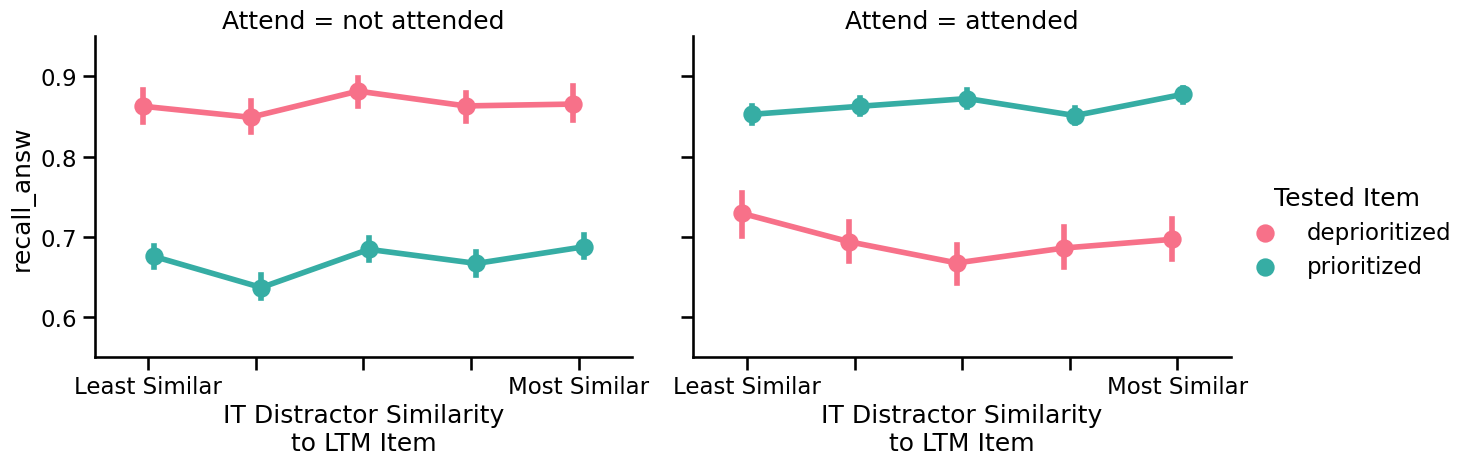

In [102]:
g = sns.catplot(
            x = 'IT Distractor Similarity\nto LTM Item',
            y = 'recall_answ',
            ci = 68,
            hue = 'Tested Item',
            col = 'Attend',
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
            palette = palette[::-1],  # Reverse the color order
            data = df_filtered_corr)
g.set(ylim=(0.55, 0.95))
plt.ylabel('Accuracy')


In [103]:
### When the seen image was validly tested

In [104]:
# df['attend']

In [105]:
# df['Attend']

In [106]:
# df['Attend Inc'] = df.apply(
#     lambda row: 'distractor' if row['ImagePath'] == row['ping_img']
#     else 'foil' if (row['category']== 'not attended')
#     else 'attended' if ((row['ImagePath'] == row['img1'] and row['attend'] == 'img1') or 
#                              (row['ImagePath'] == row['img2'] and row['attend'] == 'img2'))
#     else 'not attended',
#     axis=1
# )

In [107]:
unique_values = df['Attend'].unique()
unique_values

array(['not attended', 'foil', 'attended', 'distractor'], dtype=object)

In [108]:
# df['Reliability']

In [109]:
unique_values = df_filtered['Reliability'].unique()
print(unique_values)


['low' 'high']


In [110]:
df_correct_wm = df_filtered[
    ((df_filtered['resp_correct'] == 1))
]

# df_correct_wm = df[
#     ((df['resp_correct'] == 1) | (df['category'] == 'foil') | (df['category'] == 'distractor'))
# ]

df_incorrect_wm = df_filtered[
    ((df_filtered['resp_correct'] == 0))
]


In [111]:
df_incorrect_wm


,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,v2_ltm_diff_z,it_ltm_diff_z,v2_ltm_sq_z,it_ltm_sq_z,v2_ltm_diff_sq_z,it_ltm_diff_sq_z,LTM - NonLTM V2 Distractor Similarity,LTM - NonLTM IT Distractor Similarity,V2 Distractor Similarity to LTM Item,IT Distractor Similarity to LTM Item
25,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,1.327725,0.961166,1.605100,-0.964588,0.890009,-0.093537,1.327725,0.961166,1.860176,0.467382
32,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,1.115169,1.266974,-0.088872,0.209501,0.284206,0.743311,1.115169,1.266974,0.929397,1.081549
37,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,-0.715981,-1.363092,-0.145230,1.305304,-0.568608,1.053783,-0.715981,-1.363092,-0.881700,-1.434440
38,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,1.643549,-1.210836,1.166937,0.265039,1.984828,0.572473,1.643549,-1.210836,1.669925,-1.102155
45,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,-0.692994,1.440232,-0.190943,0.516861,-0.606395,1.319370,-0.692994,1.440232,-0.841028,1.191128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66001,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,-0.838746,0.965800,-0.646533,2.047059,-0.345928,-0.082569,-0.838746,0.965800,-0.094927,1.630528
66010,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,1.473674,0.977433,0.741172,-0.316830,1.367022,-0.054807,1.473674,0.977433,1.461523,0.862142
66018,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,1.154322,1.437641,-0.605164,1.442131,0.387875,1.310214,1.154322,1.437641,0.269112,1.472577
66021,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,1.602249,1.445889,0.090997,2.096689,1.828429,1.339424,1.602249,1.445889,1.067464,1.642813


In [112]:
# df_filtered_correct_wm = df_correct_wm[df_correct_wm['category'].isin(['tested', 'not tested'])]

# # Create the catplot
# g = sns.catplot(
#     x='category',
#     y='recall_answ',
#     ci=68,
#     hue='Attend',
# #     col='Reliability',
#     aspect=1.3,
# #     dodge=0.1,
#     kind='bar',
# #     palette=palette,  # Reverse the color order
#     data=df,
#     order=['tested', 'not tested', 'foil', 'distractor'],  # Ensure correct x-axis order
#     hue_order=['attended', 'not attended', 'distractor', 'foil']  # Prioritize Tested Item categories
# )
# g.set_ylabels('Accuracy')

# # Set y-axis limits
# g.set(ylim=(0, 0.9))

# # Set y-axis label
# g


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/567762635.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


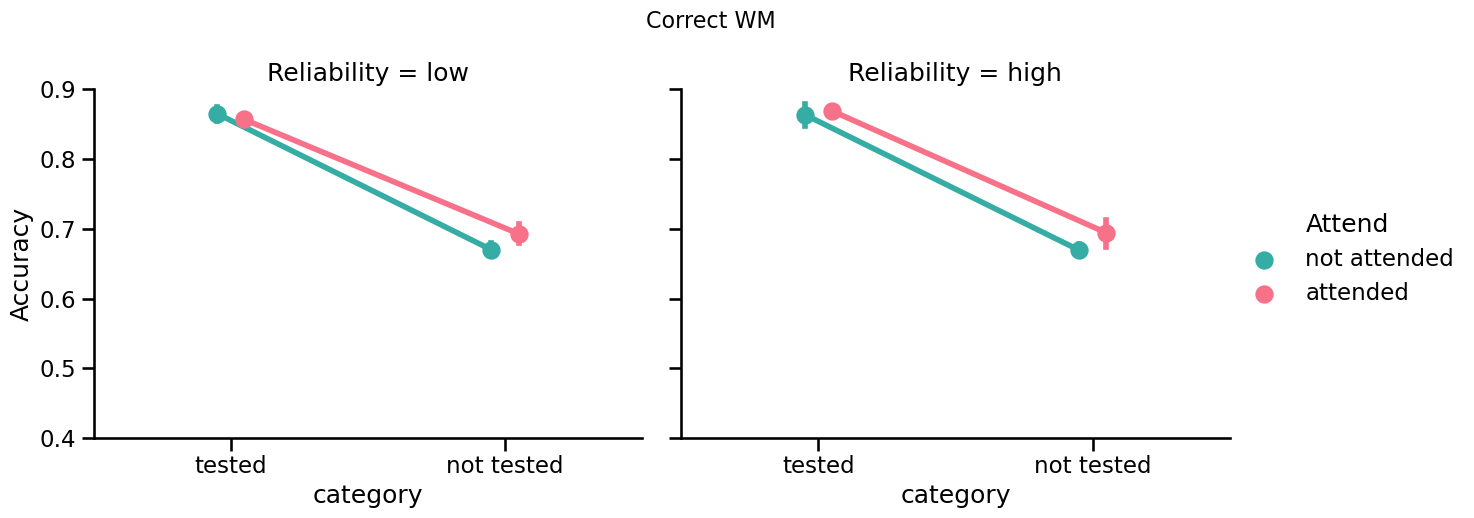

In [113]:
df_filtered_correct_wm = df_correct_wm[df_correct_wm['category'].isin(['tested', 'not tested'])]

# Create the catplot
g = sns.catplot(
    x='category',
    y='recall_answ',
    ci=68,
    hue='Attend',
    col='Reliability',
    aspect=1.3,
    dodge=0.1,
    kind='point',
    palette=palette,  # Reverse the color order
    data=df_correct_wm,
    order=['tested', 'not tested'],  # Ensure correct x-axis order
#     hue_order=tested_item_order  # Prioritize Tested Item categories
)
g.set_ylabels('Accuracy')

# Set y-axis limits
g.set(ylim=(0.4, 0.9))
g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing

# Set y-axis label
g


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/305746289.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


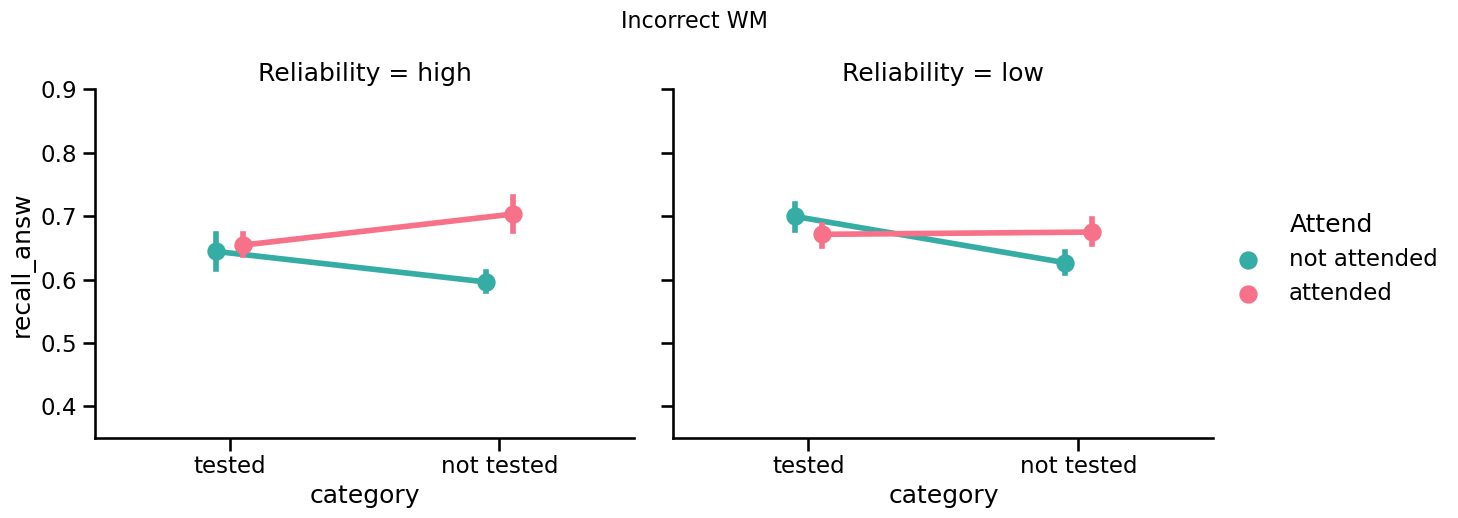

In [114]:
category_order = ['tested', 'not tested', 'foil', 'distractor']
df_filtered_incorrect_wm = df_incorrect_wm[df_incorrect_wm['category'].isin(['tested', 'not tested'])]

# Create the catplot
g = sns.catplot(
    x='category',
    y='recall_answ',
    ci=68,
    hue='Attend',
    col='Reliability',
    aspect=1.3,
    dodge=0.1,
    kind='point',
    palette=palette,  # Reverse the color order
    data=df_incorrect_wm,
    order=['tested', 'not tested']  # Ensure correct x-axis order
#     hue_order=tested_item_order  # Prioritize Tested Item categories
)

# Set y-axis limits
g.set(ylim=(0.35, 0.9))
g.fig.suptitle("Incorrect WM", y=1.05, fontsize=16)  # Adjust y for spacing

# Set y-axis label
g

In [115]:
# df_correct_tested = df_correct_wm[
#     ((df_correct_wm['category'] == 'tested')|(df_correct_wm['category'] == 'distractor'))
# ]

# df_correct_untested = df_correct_wm[
#     ((df_correct_wm['category'] == 'not tested')|(df_correct_wm['category'] == 'distractor'))

# ]

# df_incorrect_tested = df_incorrect_wm[
#     ((df_incorrect_wm['category'] == 'tested')|(df_incorrect_wm['category'] == 'distractor'))
# ]

# df_incorrect_untested = df_incorrect_wm[
#     ((df_incorrect_wm['category'] == 'not tested')|(df_incorrect_wm['category'] == 'distractor'))
# ]


In [116]:
# df_correct_tested['Prioritized - Deprioritized V2 Distractor Similarity Ranges']

In [117]:
# print(df_correct_tested['category'].unique())


In [118]:
attend_palette = {
    'distractor': '#FFC0CB',  # Blue
    'not attended': '#90D5FF',  # Orange
    'attended': '#301934',  # Green
}

In [119]:
# df_correct_tested

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/373585094.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


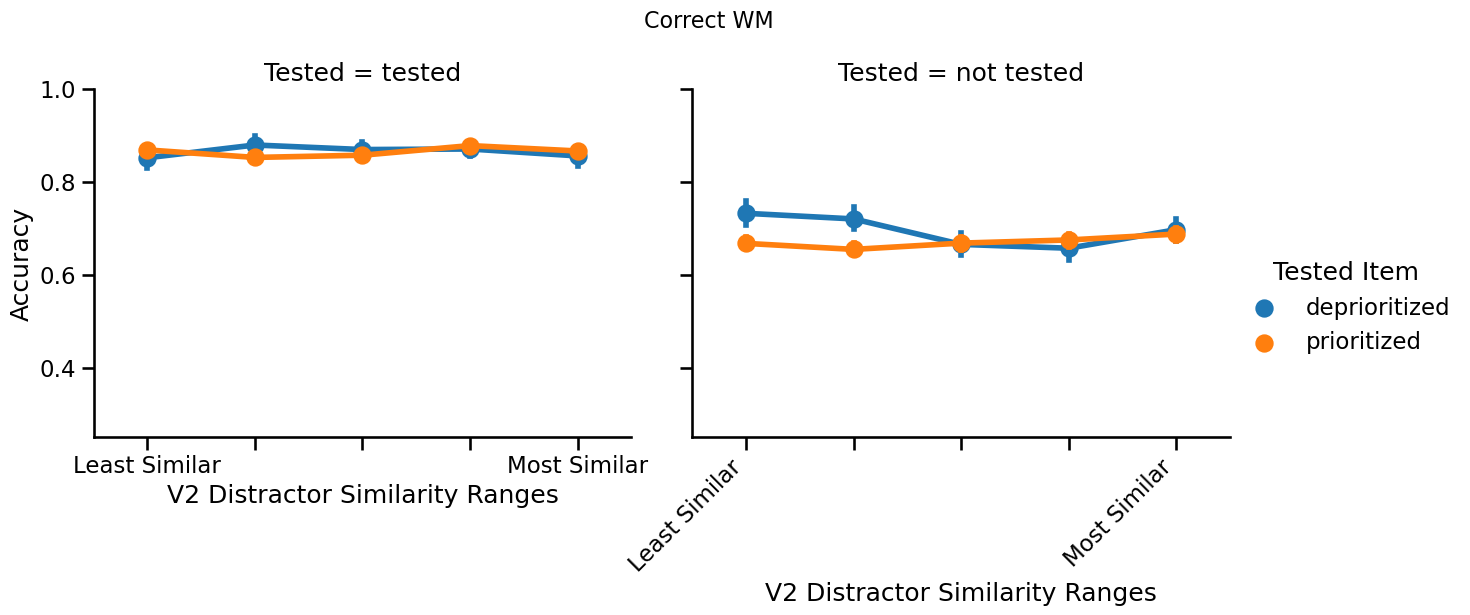

In [120]:
g = sns.catplot(
    x='LTM - NonLTM V2 Distractor Similarity Ranges',
    y='recall_answ',
    ci=68,
    hue='Tested Item',
    col='Tested',
#     col='Retrocue Reliability',
    aspect=1.3,
#     dodge=0.1,
    kind='point',
#     palette=attend_palette,  # Reverse the color order
    data=df_correct_wm,

)

g.set(ylim=(0.25, 1))
g.set_ylabels('Accuracy')
g.set_xlabels('V2 Distractor Similarity Ranges')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Adjust the angle and alignment of the labels

# Add a title
g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing

plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/981867469.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


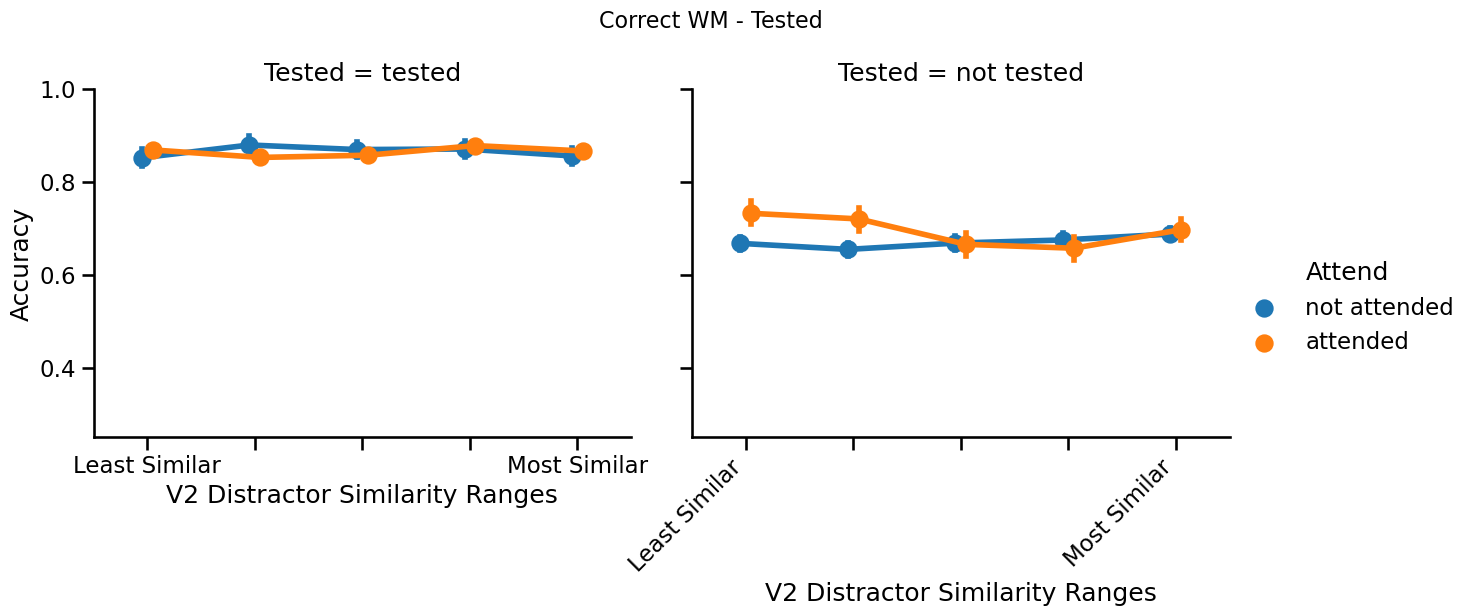

In [121]:
g = sns.catplot(
    x='LTM - NonLTM V2 Distractor Similarity Ranges',
    y='recall_answ',
    ci=68,
    hue='Attend',
    col='Tested',
#     col='Retrocue Reliability',
    aspect=1.3,
    dodge=0.1,
    kind='point',
#     palette=attend_palette,  # Reverse the color order
    data=df_correct_wm,
#     order=category_order,
#     hue_order=tested_item_order  # Prioritize Tested Item categories
    # Set the order of x-axis categories
)

g.set(ylim=(0.25, 1))
g.set_ylabels('Accuracy')
g.set_xlabels('V2 Distractor Similarity Ranges')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Adjust the angle and alignment of the labels

# Add a title
g.fig.suptitle("Correct WM - Tested", y=1.05, fontsize=16)  # Adjust y for spacing

plt.show()


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/3600274909.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


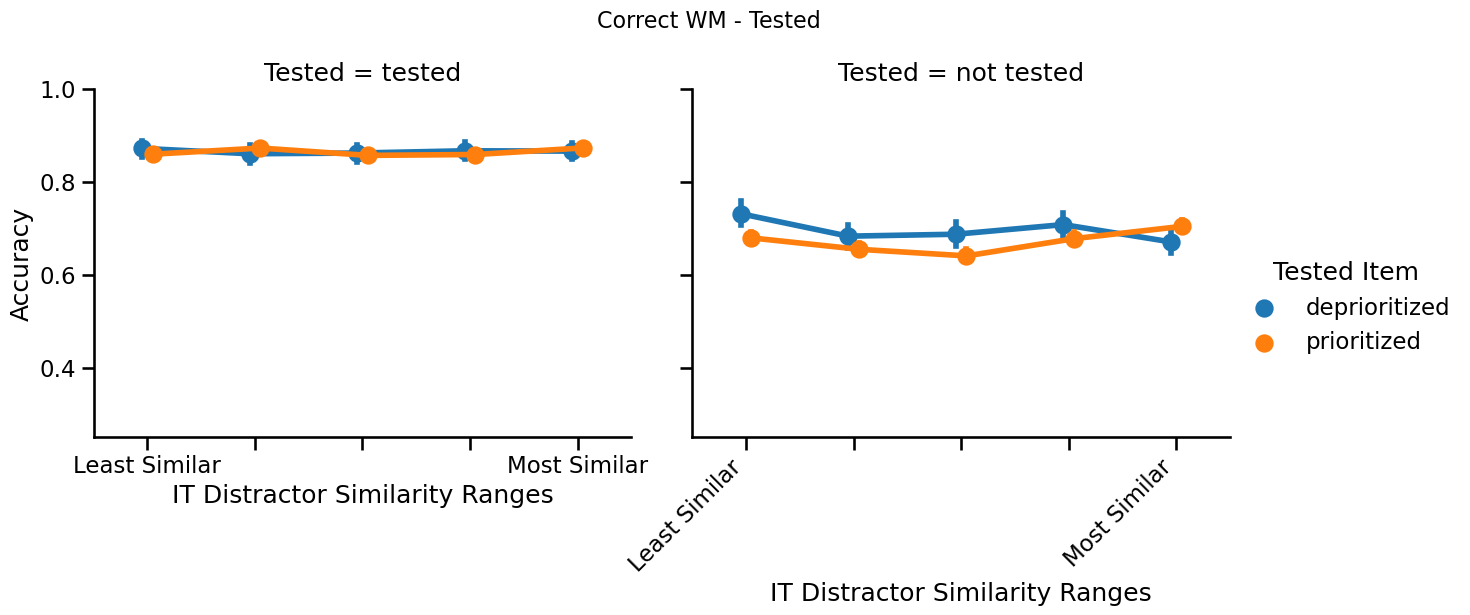

In [122]:
g = sns.catplot(
    x='LTM - NonLTM IT Distractor Similarity Ranges',
    y='recall_answ',
    ci=68,
    hue='Tested Item',
    col='Tested',
#     col='Retrocue Reliability',
    aspect=1.3,
    dodge=0.1,
    kind='point',
#     palette=attend_palette,  # Reverse the color order
    data=df_correct_wm,
#     order=category_order,
#     hue_order=tested_item_order  # Prioritize Tested Item categories
    # Set the order of x-axis categories
)

g.set(ylim=(0.25, 1))
g.set_ylabels('Accuracy')
g.set_xlabels('IT Distractor Similarity Ranges')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Adjust the angle and alignment of the labels

# Add a title
g.fig.suptitle("Correct WM - Tested", y=1.05, fontsize=16)  # Adjust y for spacing

plt.show()


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/1821993159.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


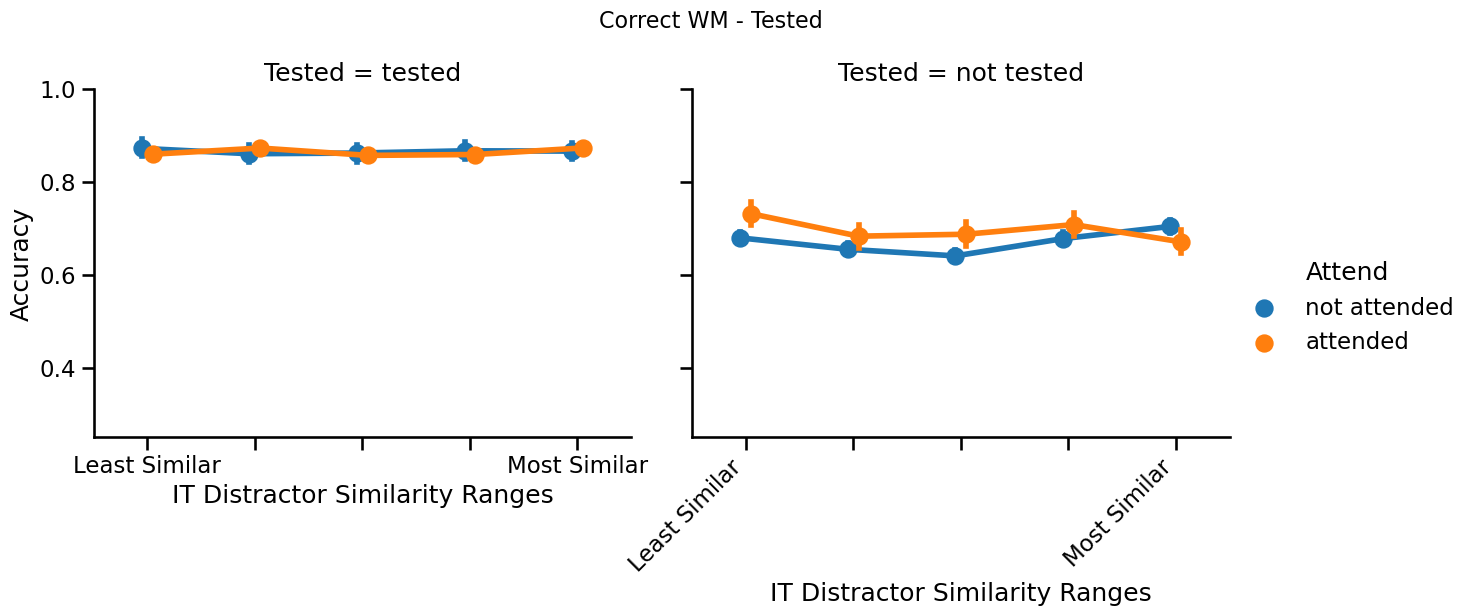

In [123]:
g = sns.catplot(
    x='LTM - NonLTM IT Distractor Similarity Ranges',
    y='recall_answ',
    ci=68,
    hue='Attend',
    col='Tested',
#     col='Retrocue Reliability',
    aspect=1.3,
    dodge=0.1,
    kind='point',
#     palette=attend_palette,  # Reverse the color order
    data=df_correct_wm,
#     order=category_order,
#     hue_order=tested_item_order  # Prioritize Tested Item categories
    # Set the order of x-axis categories
)

g.set(ylim=(0.25, 1))
g.set_ylabels('Accuracy')
g.set_xlabels('IT Distractor Similarity Ranges')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Adjust the angle and alignment of the labels

# Add a title
g.fig.suptitle("Correct WM - Tested", y=1.05, fontsize=16)  # Adjust y for spacing

plt.show()


In [124]:
df['resp_correct_within'].min()

-0.2160692951015532

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/3906377813.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


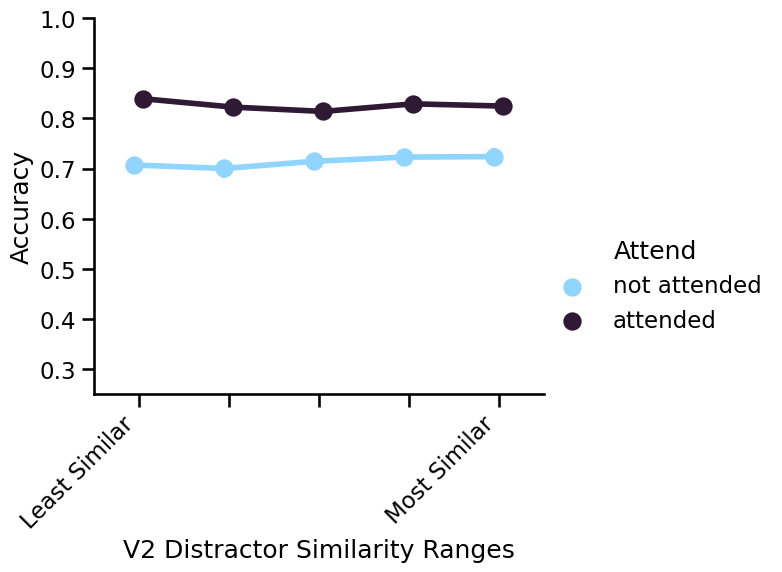

In [125]:
g = sns.catplot(
    x='LTM - NonLTM V2 Distractor Similarity Ranges',
    y='recall_answ',
    ci=68,
    hue='Attend',
#     col='Reliability',
#     col_order=['low', 'high'],
    aspect=1.3,
    dodge=0.1,
    kind='point',
    palette=attend_palette,  # Reverse the color order
    data=df_correct_wm,
#     order=category_order,
#     hue_order=tested_item_order  # Prioritize Tested Item categories
    # Set the order of x-axis categories
)

g.set(ylim=(0.25, 1))
g.set_ylabels('Accuracy')
g.set_xlabels('V2 Distractor Similarity Ranges')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Adjust the angle and alignment of the labels

# Add a title
# g.fig.suptitle("Correct WM - Untested", y=1.05, fontsize=16)  # Adjust y for spacing

plt.show()


In [126]:
# !pip install stargazer

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/3687212049.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


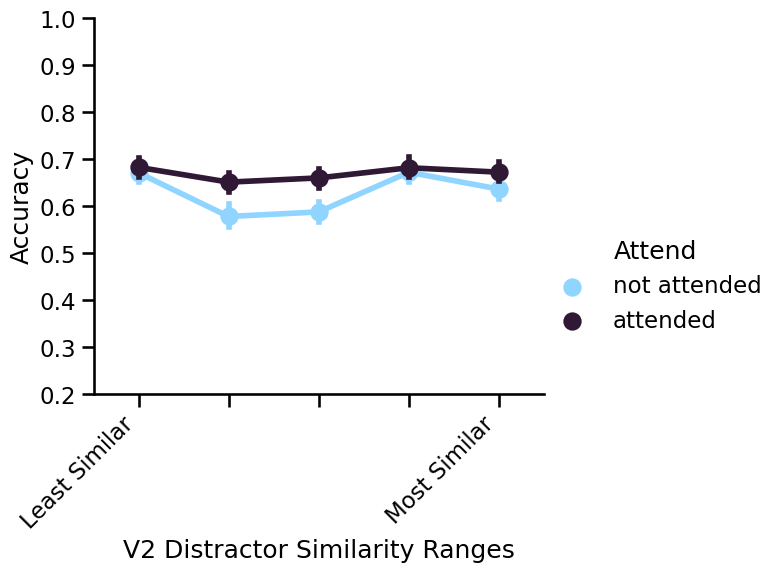

In [127]:
g = sns.catplot(
    x='LTM - NonLTM V2 Distractor Similarity Ranges',
    y='recall_answ',
    ci=68,
    hue='Attend',
#     col='Reliability',
#     col_order=['low', 'high'],
    aspect=1.3,
#     dodge=0.1,
    kind='point',
    palette=attend_palette,  # Reverse the color order
    data=df_incorrect_wm,
#     order=category_order,
#     hue_order=tested_item_order  # Prioritize Tested Item categories
    # Set the order of x-axis categories
)

g.set(ylim=(0.2, 1))
g.set_ylabels('Accuracy')
g.set_xlabels('V2 Distractor Similarity Ranges')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Adjust the angle and alignment of the labels

# Add a title
# g.fig.suptitle("Incorrect WM - Tested", y=1.05, fontsize=16)  # Adjust y for spacing

plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/1447149563.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


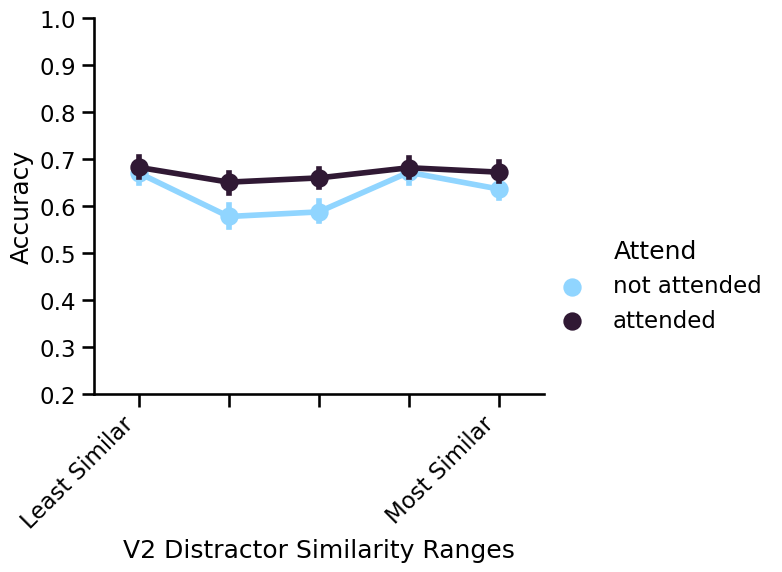

In [128]:
g = sns.catplot(
    x='LTM - NonLTM V2 Distractor Similarity Ranges',
    y='recall_answ',
    ci=68,
    hue='Attend',
#     col='Reliability',
#     col_order=['low', 'high'],
    
    aspect=1.3,
#     dodge=0.1,
    kind='point',
    palette=attend_palette,  # Reverse the color order
    data=df_incorrect_wm,
#     order=category_order,
#     hue_order=tested_item_order  # Prioritize Tested Item categories
    # Set the order of x-axis categories
)

g.set(ylim=(0.2, 1))
g.set_ylabels('Accuracy')
g.set_xlabels('V2 Distractor Similarity Ranges')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Adjust the angle and alignment of the labels

# Add a title
# g.fig.suptitle("Incorrect WM - Untested", y=1.05, fontsize=16)  # Adjust y for spacing

plt.show()

In [129]:
# df_correct_wm['category']

In [130]:
# !pip install rpy2


In [131]:

# model = smf.glm(
#     formula="recall_answ ~ resp_correct + category * validity_binary * reliability_binary * it_sim_dis_diff_z * v2_sim_dis_diff_z",
#     data=df_correct_wm,
#     family=sm.families.Binomial()  # Binary outcomes
# )


# ### here recall_answ = 1 if ltm task correct, 0 if its wrong
# ### resp_correct = 1 if wm correct
# ### category : tested, not tested, distractor, foil?

# results = model.fit()

# print(results)

In [132]:

# print(results.summary())


In [133]:
# df_correct_wm_no_dist = df_correct_wm[
#     (df_correct_wm['category'] != 'distractor')
# ]

# df_incorrect_wm_no_dist = df_incorrect_wm[
#     (df_incorrect_wm['category'] != 'distractor')
# ]


In [134]:
# df_correct_wm_no_dist['Attend']

In [135]:

# df_correct_wm_no_dist['attend_binary'] = np.where(df_correct_wm_no_dist['Attend'] == 'attended', -1 , 1)


In [136]:
# df_correct_wm_no_dist['attend_binary'] 

In [137]:
### include if the ltm item that is in wm correct dataframe was tested or not in the wm

## tested vs untested in wm wrt to the wm item

In [138]:
# df_correct_wm_no_dist['test']

In [139]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()


In [140]:
# df_correct_wm_no_dist['mem_stim_type'] = np.where(df_correct_wm_no_dist['mem_stim_type'] == 'tested', -1 , 1)

# df_correct_wm_no_dist['mem_stim_type_z'] = scaler.fit_transform(df_correct_wm_no_dist[['mem_stim_type']])


In [141]:
df_filtered['Tested Item']

0        deprioritized
2          prioritized
16         prioritized
19       deprioritized
20         prioritized
             ...      
66080      prioritized
66083    deprioritized
66085      prioritized
66093    deprioritized
66097    deprioritized
Name: Tested Item, Length: 20517, dtype: object

In [145]:
df_correct_wm.to_csv('pilot_TOTAL_stats/correct_wm_ltm.csv', index=False)


In [146]:
df_incorrect_wm.to_csv('pilot_TOTAL_stats/incorrect_wm_ltm.csv', index=False)


In [147]:
df_distractor_correct_wm = df_distractor[
    ((df_distractor['resp_correct'] == 1))
]

In [148]:
df_distractor_correct_wm['category']

33       distractor
41       distractor
71       distractor
97       distractor
114      distractor
            ...    
66040    distractor
66046    distractor
66053    distractor
66072    distractor
66087    distractor
Name: category, Length: 8357, dtype: object

In [149]:
df_distractor_correct_wm.to_csv('pilot_TOTAL_stats/distractor_wm_ltm.csv', index=False)


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/3135846780.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(115.82085737179487, 0.5, 'Accuracy')

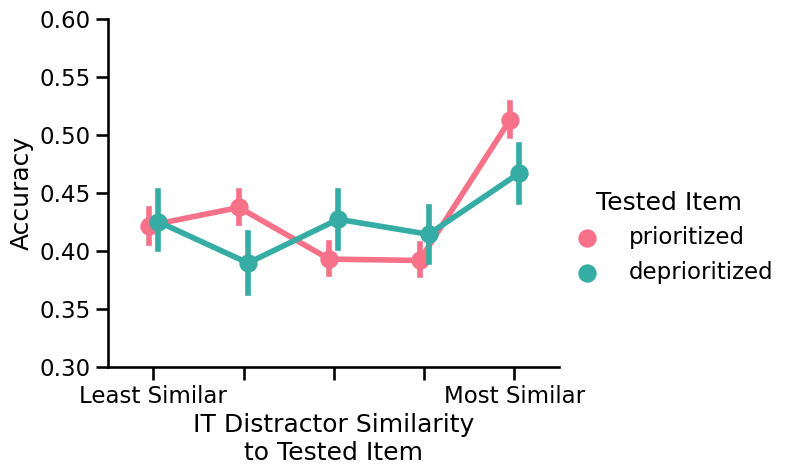

In [150]:
g = sns.catplot(
            x = 'IT Distractor Similarity\nto Tested Item',
            y = 'recall_answ',
            ci = 68,
#             row = 'Retrocue Reliability',
#             row_order = ['low', 'high'],
            hue = 'Tested Item',
#             col = 'Attend',
        
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
            palette = palette[::-1],  # Reverse the color order
#             palette = palette,  # Reverse the color order
            data = df_distractor_correct_wm)
g.set(ylim=(0.3, 0.6))
plt.ylabel('Accuracy')

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/1149414566.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(-7.805555555555555, 0.5, 'Accuracy')

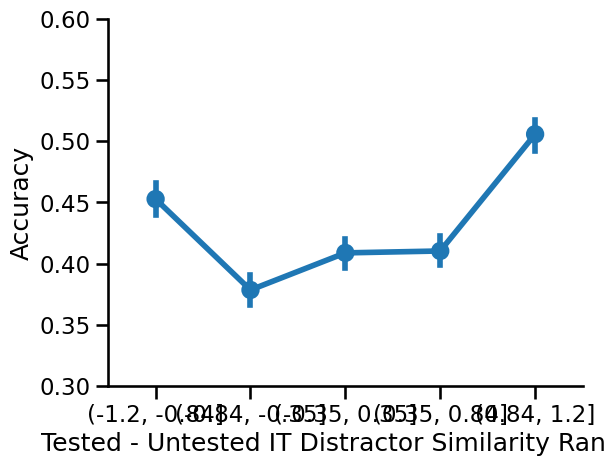

In [170]:

g = sns.catplot(
            x =  'Tested - Untested IT Distractor Similarity Ranges',
            y = 'recall_answ',
            ci = 68,
#             hue = 'Retrocue Reliability',
#             row_order = ['low', 'high'],
#             hue = 'Tested Item',
#             col = 'Attend',
        
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             palette = palette,  # Reverse the color order
            data = df_distractor_correct_wm)
g.set(ylim=(0.3, 0.6))
plt.ylabel('Accuracy')

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/3825801808.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(96.08554487179485, 0.5, 'Accuracy')

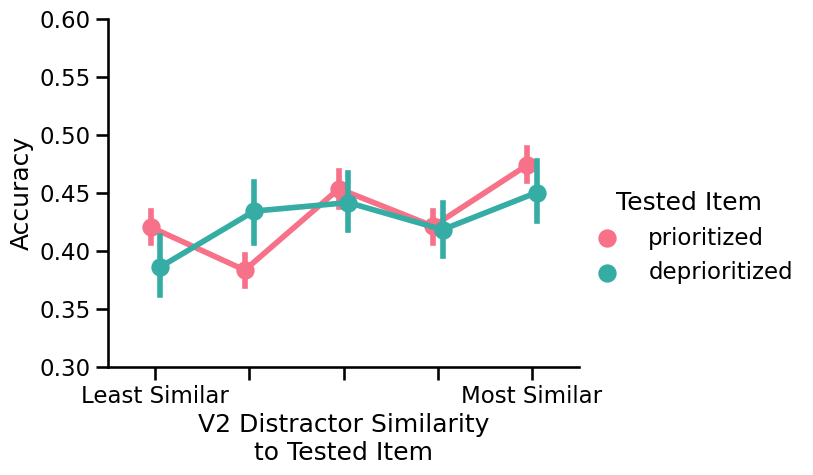

In [152]:
g = sns.catplot(
            x = 'V2 Distractor Similarity\nto Tested Item',
            y = 'recall_answ',
            ci = 68,
#             row = 'Retrocue Reliability',
#             row_order = ['low', 'high'],
            hue = 'Tested Item',        
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
            palette = palette[::-1],  # Reverse the color order
#             palette = palette,  # Reverse the color order
            data = df_distractor_correct_wm)
g.set(ylim=(0.3, 0.6))
plt.ylabel('Accuracy')

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/3801935945.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(96.08554487179485, 0.5, 'Accuracy')

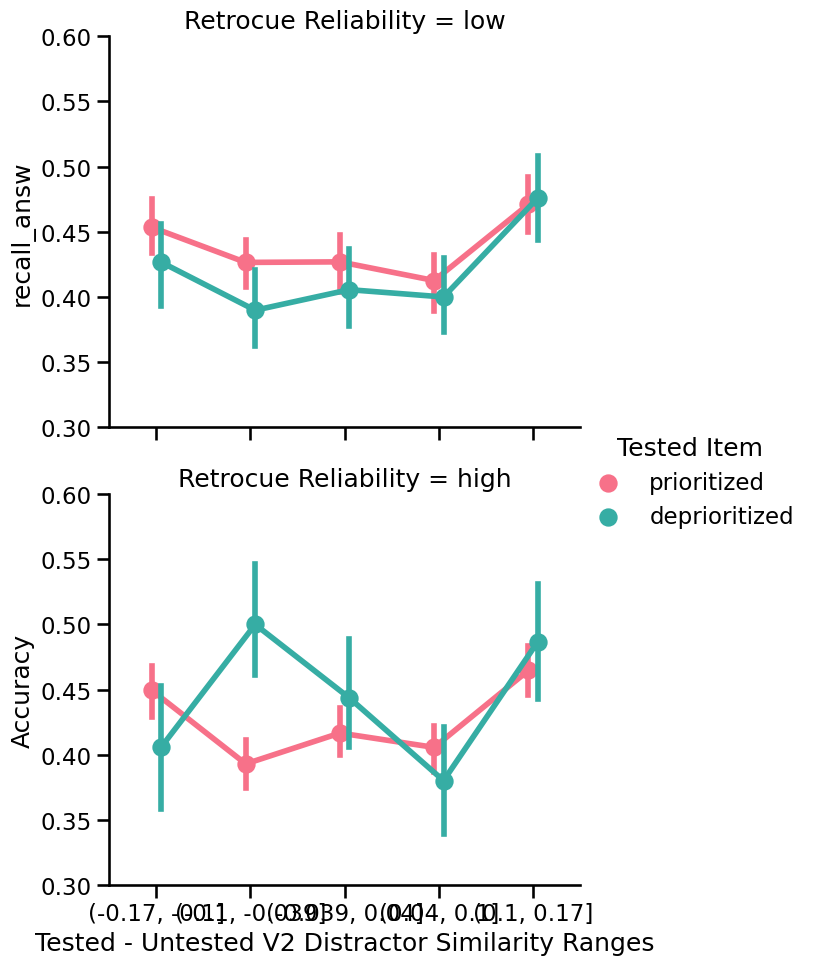

In [153]:

g = sns.catplot(
            x =  'Tested - Untested V2 Distractor Similarity Ranges',
            y = 'recall_answ',
            ci = 68,
            row = 'Retrocue Reliability',
            row_order = ['low', 'high'],
            hue = 'Tested Item',
#             col = 'Attend',
        
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
            palette = palette[::-1],  # Reverse the color order
#             palette = palette,  # Reverse the color order
            data = df_distractor_correct_wm)
g.set(ylim=(0.3, 0.6))
plt.ylabel('Accuracy')

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/3539657483.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(123.04094284188035, 0.5, 'Accuracy')

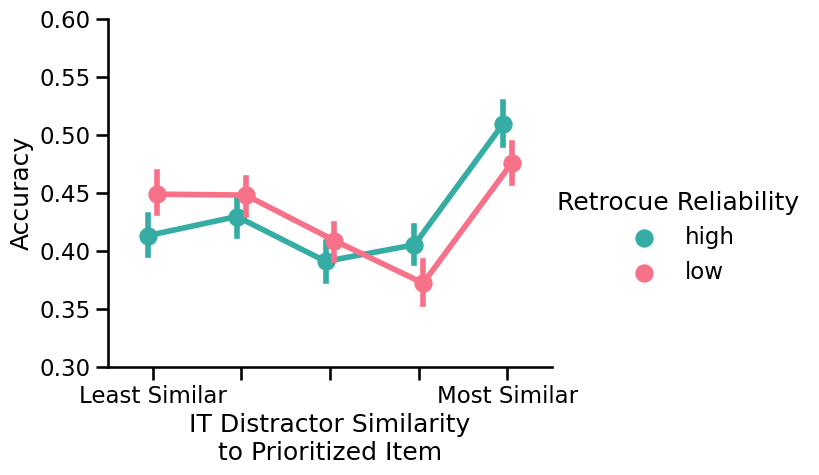

In [154]:
g = sns.catplot(
            x = 'IT Distractor Similarity\nto Prioritized Item',
            y = 'recall_answ',
            ci = 68,
            hue = 'Retrocue Reliability',
#             row_order = ['low', 'high'],
#             hue = 'Tested Item',
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
            palette = palette,  # Reverse the color order
            data = df_distractor_correct_wm)
g.set(ylim=(0.3, 0.6))
plt.ylabel('Accuracy')

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/3798434617.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(6.819444444444445, 0.5, 'Accuracy')

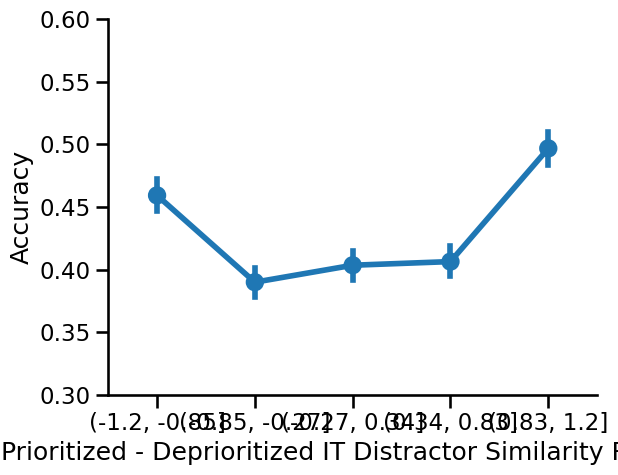

In [155]:
g = sns.catplot(
            x = 'Prioritized - Deprioritized IT Distractor Similarity Ranges',
            y = 'recall_answ',
            ci = 68,
#             row = 'Retrocue Reliability',
#             row_order = ['low', 'high'],
#             hue = 'Tested Item',
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             palette = palette,  # Reverse the color order
            data = df_distractor_correct_wm)
g.set(ylim=(0.3, 0.6))
plt.ylabel('Accuracy')

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/1815720039.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(6.819444444444445, 0.5, 'Accuracy')

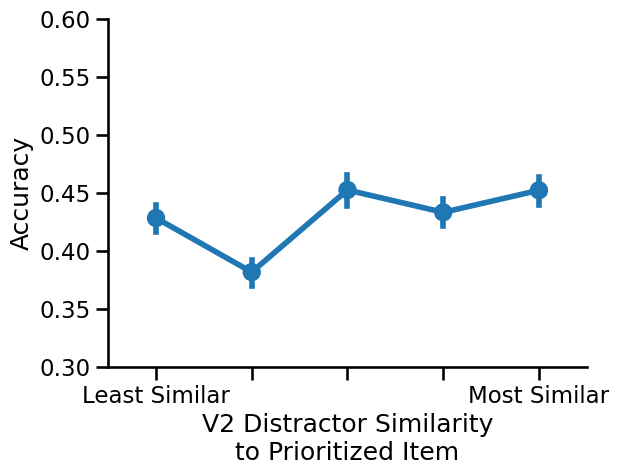

In [156]:
g = sns.catplot(
            x = 'V2 Distractor Similarity\nto Prioritized Item',
            y = 'recall_answ',
            ci = 68,
#             row = 'Retrocue Reliability',
#             row_order = ['low', 'high'],
#             hue = 'Tested Item',
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             palette = palette,  # Reverse the color order
            data = df_distractor_correct_wm)
g.set(ylim=(0.3, 0.6))
plt.ylabel('Accuracy')

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/824004088.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(102.55563034188033, 0.5, 'Accuracy')

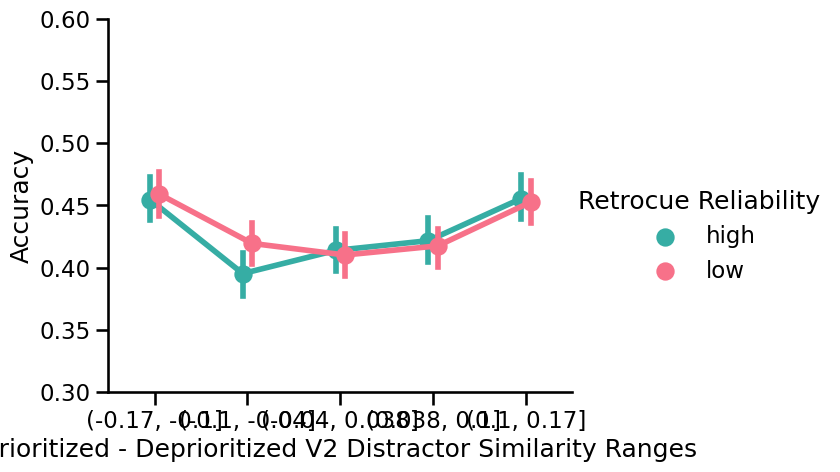

In [157]:
g = sns.catplot(
            x = 'Prioritized - Deprioritized V2 Distractor Similarity Ranges',
            y = 'recall_answ',
            ci = 68,
            hue = 'Retrocue Reliability',
#             row_order = ['low', 'high'],
#             hue = 'Tested Item',
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
            palette = palette,  # Reverse the color order
            data = df_distractor_correct_wm)
g.set(ylim=(0.3, 0.6))
plt.ylabel('Accuracy')

In [158]:
attend_palette = {
    'distractor': '#FFC0CB',  # Blue
    'not attended': '#90D5FF',  # Orange
    'attended': '#301934',  # Green
}

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/1242503283.py:46: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


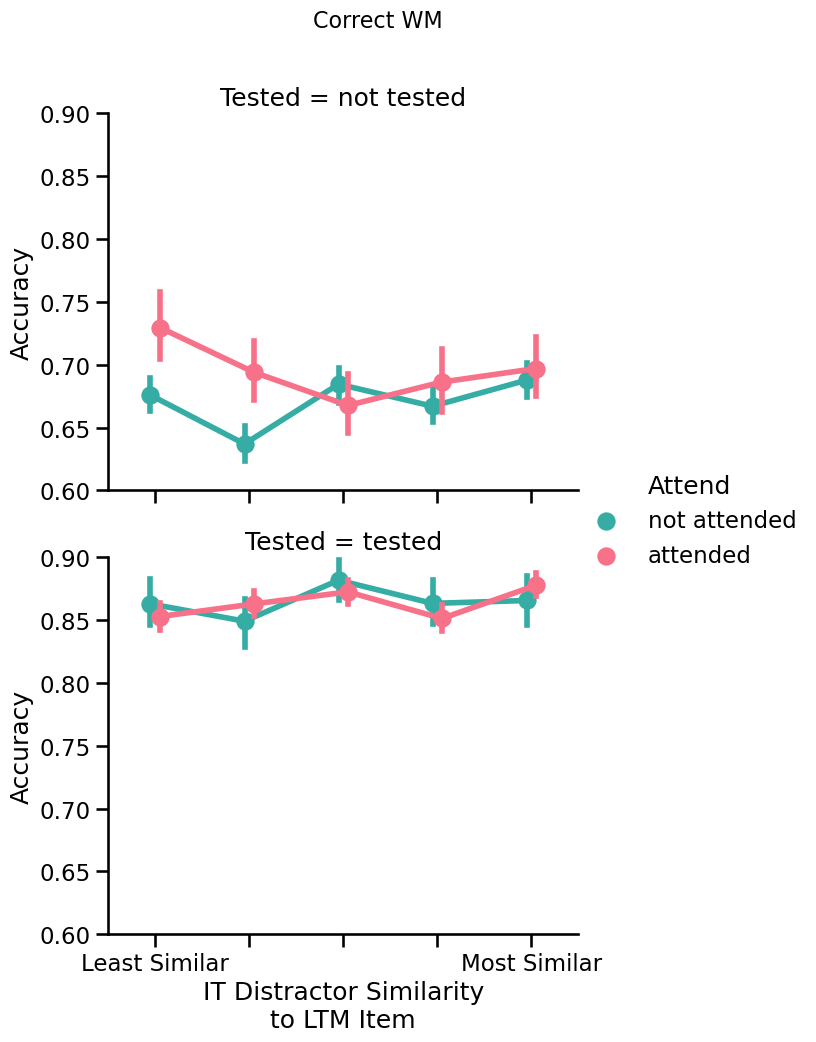

In [159]:
# g = sns.catplot(
#     x='IT Distractor Similarity\nto LTM Item',
#     y='recall_answ',
#     ci=68,
#     hue ='Tested',
#     row = 'Attend',
#     col_order = ['low', 'high'],
#     row_order = ['not attended', 'attended'],
#     col='Retrocue Reliability',
#     aspect=1.3,
#     dodge=0.1,
#     kind='point',
#     palette=palette,  # Reverse the color order
#     data=df_correct_wm,

# )

# g.set(ylim=(0.45, 1))
# g.set_ylabels('Accuracy')
# g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing
# plt.show()

# g = sns.catplot(
#     x='IT Distractor Similarity\nto LTM Item',
#     y='recall_answ',
#     ci=68,
#     row ='Tested',
#     hue = 'Attend',
#     col_order = ['low', 'high'],
#     row_order = ['not tested', 'tested'],
    
#     col='Retrocue Reliability',
#     aspect=1.3,
#     dodge=0.1,
#     kind='point',
#     palette=palette,  # Reverse the color order
#     data=df_correct_wm,

# )

# g.set(ylim=(0.45, 1))
# g.set_ylabels('Accuracy')
# g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing
# plt.show()

g = sns.catplot(
    x='IT Distractor Similarity\nto LTM Item',
    y='recall_answ',
    ci=68,
    hue='Attend',
    row = 'Tested',
    row_order = ['not tested', 'tested'],
#     col='Tested',
#     col='Retrocue Reliability',
    aspect=1.3,
    dodge=0.1,
    kind='point',
    palette=palette,  # Reverse the color order
    data=df_correct_wm,

)

g.set(ylim=(0.6, 0.9))
g.set_ylabels('Accuracy')
g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing
plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/4001938563.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


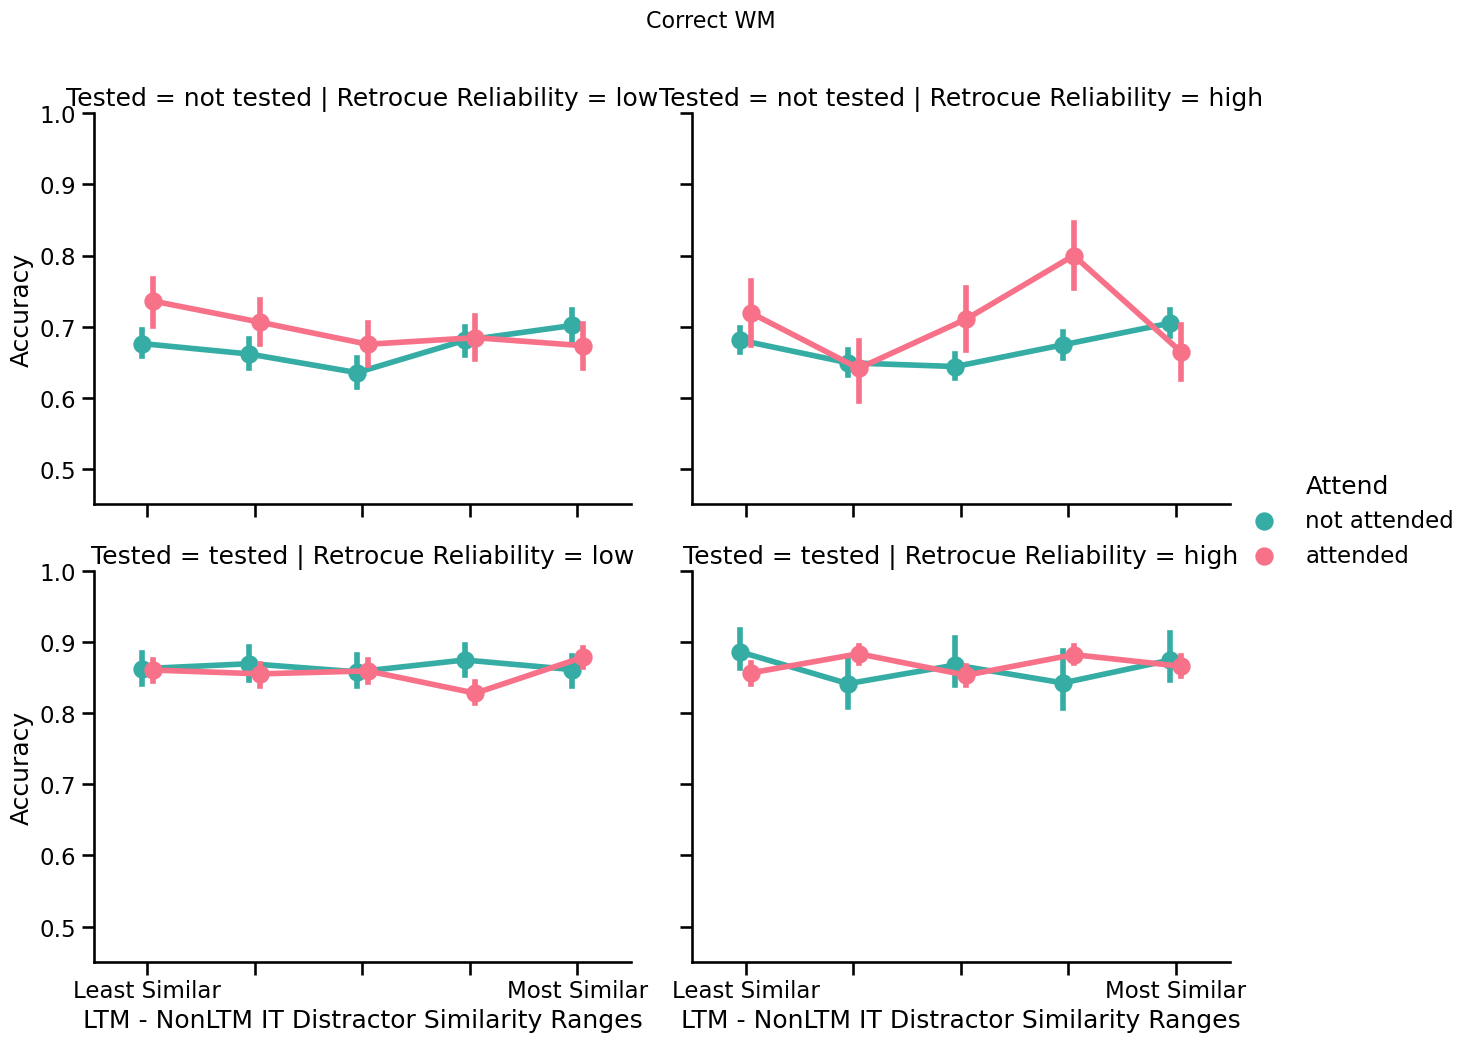

In [160]:
g = sns.catplot(
    x='LTM - NonLTM IT Distractor Similarity Ranges',
    y='recall_answ',
    ci=68,
    hue='Attend',
    row = 'Tested',
    row_order = ['not tested', 'tested'],

#     col='Tested',
    col='Retrocue Reliability',
    aspect=1.3,
    dodge=0.1,
    kind='point',
    palette=palette,  # Reverse the color order
    data=df_correct_wm,

)

g.set(ylim=(0.45, 1))
g.set_ylabels('Accuracy')
g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing
plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/954946540.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


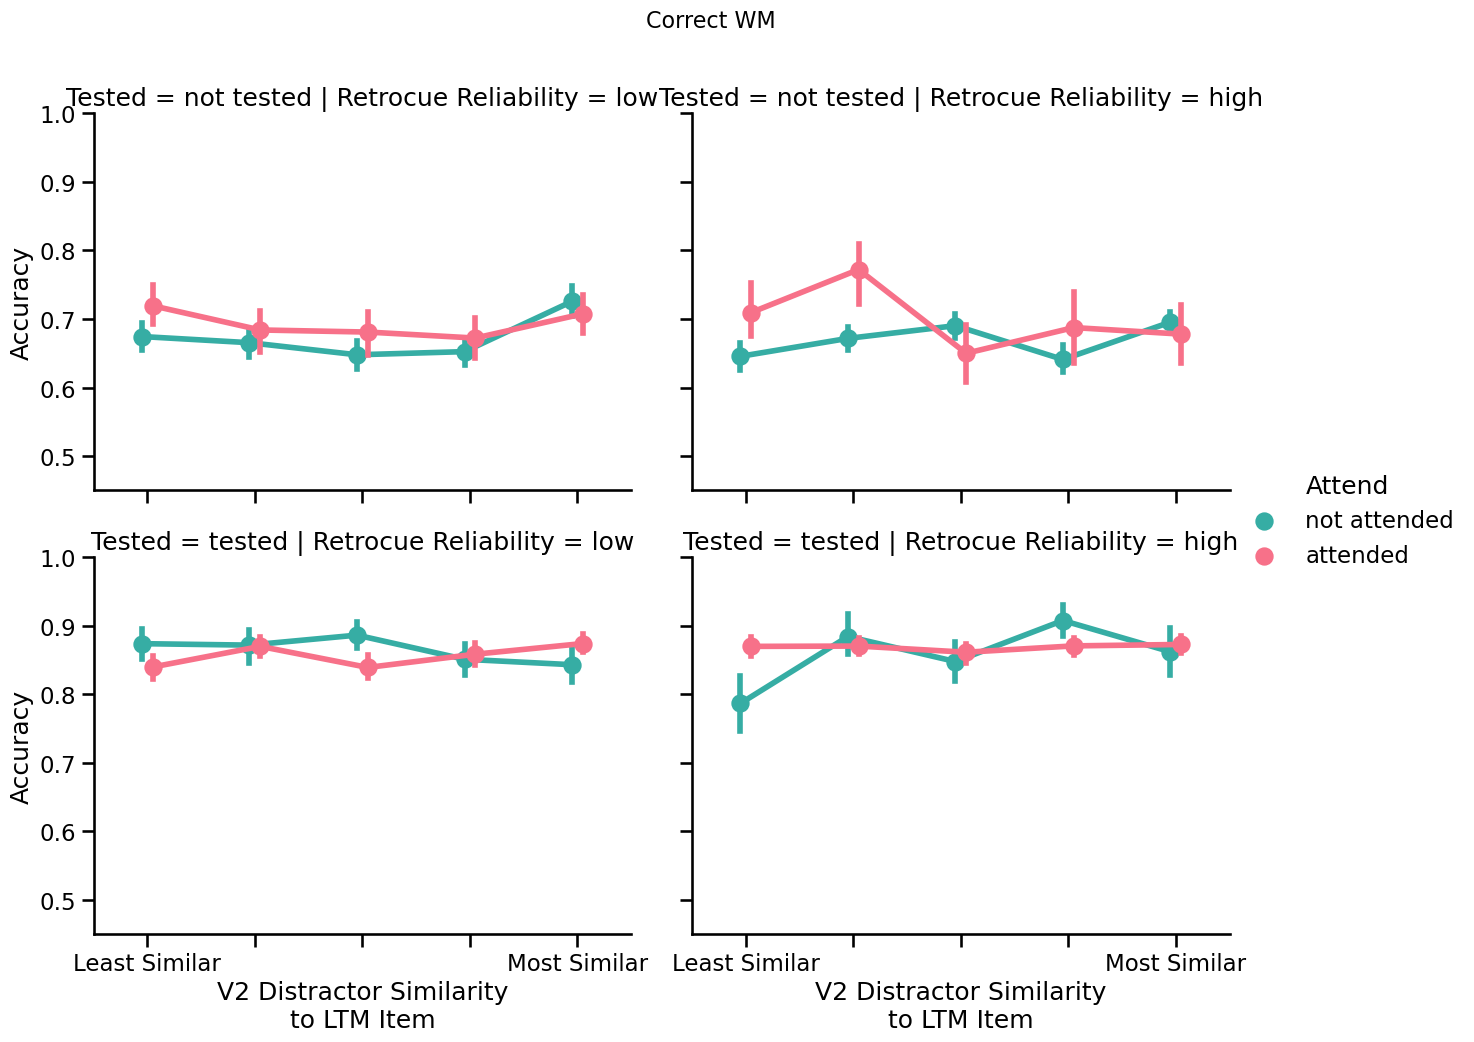

In [161]:
g = sns.catplot(
    x='V2 Distractor Similarity\nto LTM Item',
    y='recall_answ',
    ci=68,
    hue='Attend',
    row = 'Tested',
    row_order = ['not tested', 'tested'],

#     col='Tested',
    col='Retrocue Reliability',
    aspect=1.3,
    dodge=0.1,
    kind='point',
    palette=palette,  # Reverse the color order
    data=df_correct_wm,

)

g.set(ylim=(0.45, 1))
g.set_ylabels('Accuracy')
g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing
plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_67088/154441639.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


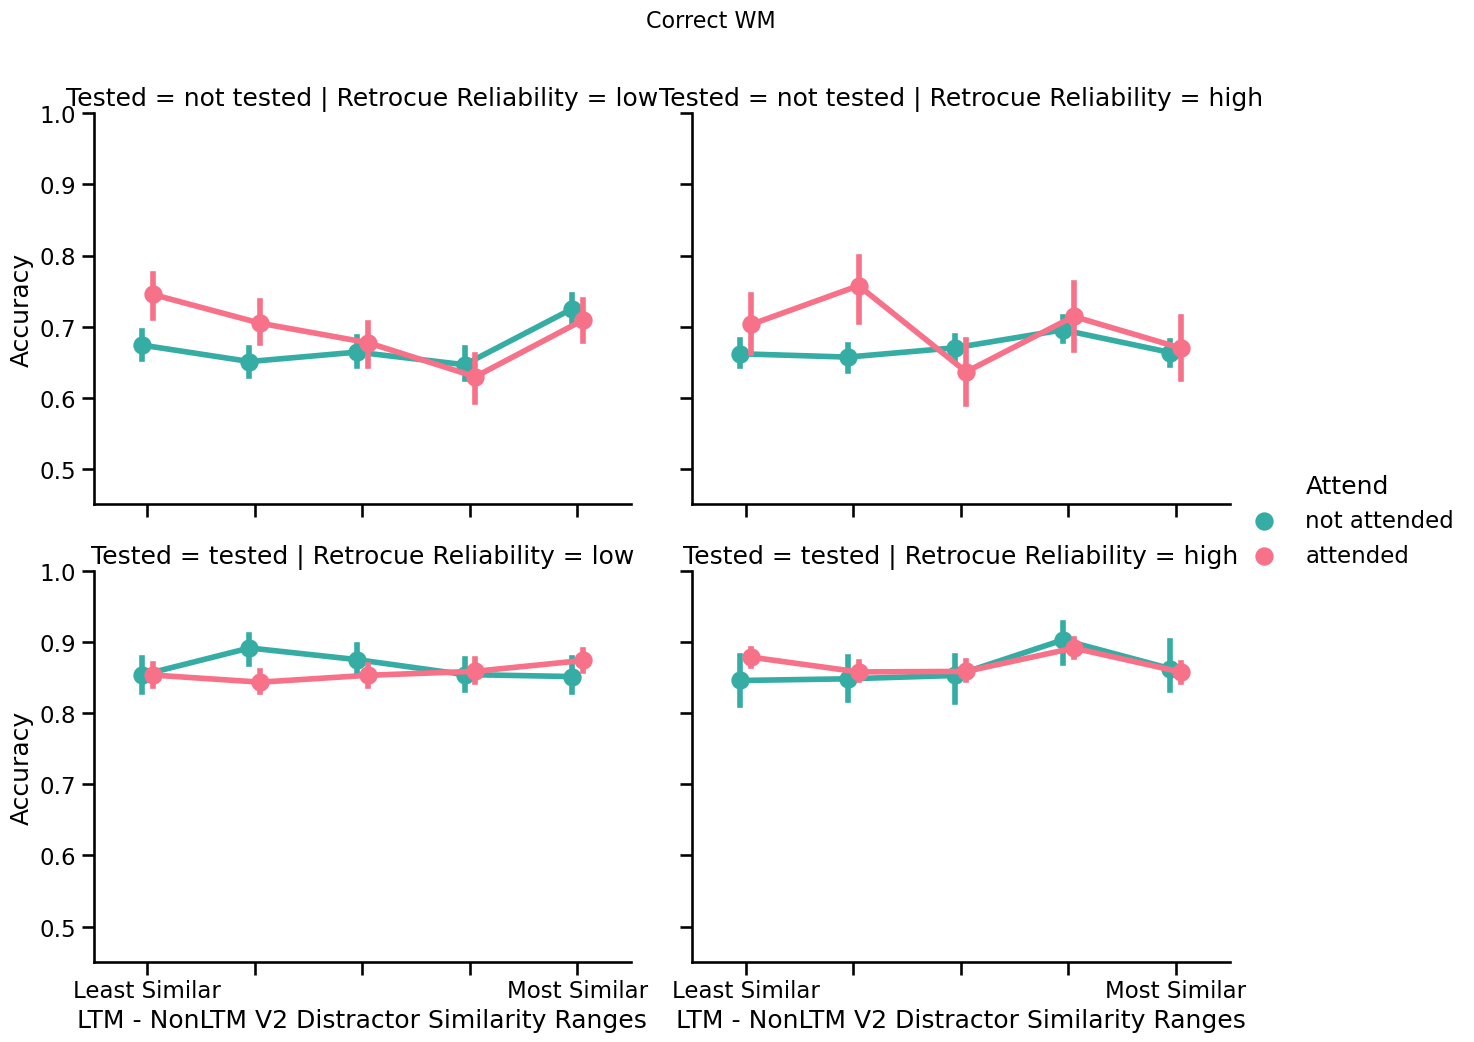

In [162]:
g = sns.catplot(
    x='LTM - NonLTM V2 Distractor Similarity Ranges',
    y='recall_answ',
    ci=68,
    hue='Attend',
    row = 'Tested',
    row_order = ['not tested', 'tested'],

#     col='Tested',
    col='Retrocue Reliability',
    aspect=1.3,
    dodge=0.1,
    kind='point',
    palette=palette,  # Reverse the color order
    data=df_correct_wm,

)

g.set(ylim=(0.45, 1))
g.set_ylabels('Accuracy')
g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing
plt.show()

In [163]:
# df_incorrect_wm

In [164]:
df_wm = pd.concat([df_correct_wm, df_incorrect_wm], axis=0)
df_wm

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,v2_ltm_diff_z,it_ltm_diff_z,v2_ltm_sq_z,it_ltm_sq_z,v2_ltm_diff_sq_z,it_ltm_diff_sq_z,LTM - NonLTM V2 Distractor Similarity,LTM - NonLTM IT Distractor Similarity,V2 Distractor Similarity to LTM Item,IT Distractor Similarity to LTM Item
0,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,1.535576,1.107287,2.279829,0.096651,1.584351,0.277668,1.535576,1.107287,2.120014,1.038418
2,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,-0.146481,-1.352825,-0.626602,0.674097,-1.141652,1.019537,-0.146481,-1.352825,-0.198901,-1.243457
16,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,-1.309870,0.330165,-0.608706,-1.180058,0.835067,-1.094278,-1.309870,0.330165,-0.258826,-0.209433
19,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,-1.050896,1.417604,-0.348703,-0.000591,0.121782,1.239948,-1.050896,1.417604,-0.682288,0.999761
20,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,0.841077,-0.277416,-0.452896,-0.639118,-0.341361,-1.133639,0.841077,-0.277416,0.553004,-0.694375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66001,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,-0.838746,0.965800,-0.646533,2.047059,-0.345928,-0.082569,-0.838746,0.965800,-0.094927,1.630528
66010,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,1.473674,0.977433,0.741172,-0.316830,1.367022,-0.054807,1.473674,0.977433,1.461523,0.862142
66018,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,1.154322,1.437641,-0.605164,1.442131,0.387875,1.310214,1.154322,1.437641,0.269112,1.472577
66021,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,1.602249,1.445889,0.090997,2.096689,1.828429,1.339424,1.602249,1.445889,1.067464,1.642813


In [165]:
df_wm_no_dist = df_wm[
    (df_wm['category'] != 'distractor')
]


In [166]:
# df_wm_no_dist.to_csv('pilot5_stats/wm_ltm_no_dist.csv')

In [167]:
# sub_df_valid = df[df.apply(lambda row: any((df['participant'] == row['participant']) & (df['img1'] == row['ImagePath'])), axis=1)]
df_valid_attend = df[
    ((df['ImagePath'] == df['img1']) & (df['validity'] == 'valid') & (df['attend'] == 'img1'))|
    ((df['ImagePath'] == df['img2']) & (df['validity'] == 'valid') & (df['attend'] == 'img2'))
]

df_valid_unattend = df[
    ((df['ImagePath'] == df['img1']) & (df['validity'] == 'valid') & (df['attend'] == 'img2'))|
    ((df['ImagePath'] == df['img2']) & (df['validity'] == 'valid') & (df['attend'] == 'img1'))
]

df_invalid_attend = df[
    ((df['ImagePath'] == df['img1']) & (df['validity'] == 'invalid') & (df['attend'] == 'img1'))|
    ((df['ImagePath'] == df['img2']) & (df['validity'] == 'invalid') & (df['attend'] == 'img2'))
]

df_invalid_unattend = df[
    ((df['ImagePath'] == df['img1']) & (df['validity'] == 'invalid') & (df['attend'] == 'img2'))|
    ((df['ImagePath'] == df['img2']) & (df['validity'] == 'invalid') & (df['attend'] == 'img1'))
]

In [168]:
print("No Problemo 2")

No Problemo 2


In [ ]:
# df_attended = pd.concat([df_valid_attend, df_invalid_attend], ignore_index=True)


In [ ]:
## wm accuracy by priority and tested item

##is being tested before showing any effect
## also split by correct and incorrect trials from wm task

In [ ]:
### first categoriaze by wm task if they were correct or incorrect


### then memory for tested and untested items as a function of wherer they were prioritized or deprioritized

In [ ]:
# df

In [ ]:
# df['category_wm_ltm'] = 

In [ ]:
# df_correct_wm = df[
#     ((df['resp_correct'] == 1)) ]


In [ ]:
# df_incorrect_wm = df[
#     ((df['resp_correct'] == 0)) ]


In [ ]:
# g = sns.catplot(
#             x = 'Prioritized - Deprioritized V2 Distractor Similarity Ranges',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_correct_wm)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# g = sns.catplot(
#             x = 'Prioritized - Deprioritized V2 Distractor Similarity Ranges',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_correct_wm)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# g = sns.catplot(
#             x = 'Prioritized - Deprioritized V2 Distractor Similarity Ranges',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_correct_wm)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# g = sns.catplot(
#             x = 'V2 Distractor Similarity\nto Prioritized Item',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_attended)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Seen and Attended images", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# g = sns.catplot(
#             x = 'V2 Distractor Similarity\nto Deprioritized Item',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_attended)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Seen and Attended images", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
##tested/untested and distractor and then split up by prioritized and deprioritized

In [ ]:
# g = sns.catplot(
#             x = 'Prioritized - Deprioritized V2 Distractor Similarity Ranges',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_attended)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Seen and Attended images", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# g = sns.catplot(
#             x = 'IT Distractor Similarity\nto Prioritized Item',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_attended)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Seen and Attended images", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# g = sns.catplot(
#             x = 'IT Distractor Similarity\nto Deprioritized Item',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_attended)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Seen and Attended images", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# g = sns.catplot(
#             x = 'Prioritized - Deprioritized V2 Distractor Similarity Ranges',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_attended)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Seen and Attended images", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# import numpy as np

# # Define the conditions for each case
# conditions = [
#     ((df['ImagePath'] == df['img1']) & (df['validity'] == 'valid') & (df['attend'] == 'img1')) |
#     ((df['ImagePath'] == df['img2']) & (df['validity'] == 'valid') & (df['attend'] == 'img2')),

#     ((df['ImagePath'] == df['img1']) & (df['validity'] == 'valid') & (df['attend'] == 'img2')) |
#     ((df['ImagePath'] == df['img2']) & (df['validity'] == 'valid') & (df['attend'] == 'img1')),

#     ((df['ImagePath'] == df['img1']) & (df['validity'] == 'invalid') & (df['attend'] == 'img1')) |
#     ((df['ImagePath'] == df['img2']) & (df['validity'] == 'invalid') & (df['attend'] == 'img2')),

#     ((df['ImagePath'] == df['img1']) & (df['validity'] == 'invalid') & (df['attend'] == 'img2')) |
#     ((df['ImagePath'] == df['img2']) & (df['validity'] == 'invalid') & (df['attend'] == 'img1'))
# ]

# # Define the assignments for each case
# assignments = [
#     # Condition 1: Valid and attended image is the same
#     {
#         'seen_img': 'tested',
#         'IT_to_seen_image': df['it_sim_dis_attend'],
#         'V2_to_seen_image': df['v2_sim_dis_attend'],
#         'IT_relative': df['Prioritized - Deprioritized IT Distractor Similarity Ranges'],
#         'V2_relative': df['Prioritized - Deprioritized V2 Distractor Similarity Ranges']
#     },
#     # Condition 2: Valid but attended image is not the same, flipping certain fields
#     { 
# #         flip retrocue
#         'seen_img': 'not tested',
#         'IT_to_seen_image': df['it_sim_dis_unattend'],
#         'V2_to_seen_image': df['v2_sim_dis_unattend'],
#         'IT_relative': np.where(df['attend'] == 'img2', df['IT_root_im1'] - df['IT_root_im2'], df['IT_root_im2'] - df['IT_root_im1']),
#         'V2_relative': np.where(df['attend'] == 'img2', df['V2_root_im1'] - df['V2_root_im2'], df['V2_root_im2'] - df['V2_root_im1'])
#     },
#     # Condition 3: Invalid and attended image is the same
#     {
#         'seen_img': 'not tested',
#         'IT_to_seen_image': df['it_sim_dis_attend'],
#         'V2_to_seen_image': df['v2_sim_dis_attend'],
#         'IT_relative': df['Prioritized - Deprioritized IT Distractor Similarity Ranges'],
#         'V2_relative': df['Prioritized - Deprioritized V2 Distractor Similarity Ranges']
#     },
#     # Condition 4: Invalid and attended image is not the same
#     {#         flip retrocue

#         'seen_img': 'tested',
#         'IT_to_seen_image': df['it_sim_dis_unattend'],
#         'V2_to_seen_image': df['v2_sim_dis_unattend'],
#         'IT_relative': np.where(df['attend'] == 'img2', df['IT_root_im1'] - df['IT_root_im2'], df['IT_root_im2'] - df['IT_root_im1']),
#         'V2_relative': np.where(df['attend'] == 'img2', df['V2_root_im1'] - df['V2_root_im2'], df['V2_root_im2'] - df['V2_root_im1'])
#     }
# ]

# # Apply each condition to assign values
# for column, values in assignments[0].items():
#     df[column] = np.select(conditions, [assignment[column] for assignment in assignments], default=np.nan)

# # # Additional derived columns
# # df['it_sim_dis_diff'] = np.where(df['attend'] == 'img1', df['IT_root_im1'] - df['IT_root_im2'], df['IT_root_im2'] - df['IT_root_im1'])
# # df['v2_sim_dis_diff'] = np.where(df['attend'] == 'img1', df['V2_root_im1'] - df['V2_root_im2'], df['V2_root_im2'] - df['V2_root_im1'])

# # Normalize 'it_sim_dis_diff'
# df['it_sim_dis_diff'] = df['it_sim_dis_diff'] - df['it_sim_dis_diff'].mean(skipna=True)


In [ ]:
# df['it_sim_dis_unattend']

In [ ]:
# g = sns.catplot(
#             x = 'IT_relative',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_attended)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Seen and Attended images", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# sub_df = df[df.apply(lambda row: any((df['participant'] == row['participant']) & (df['ping_img'] == row['ImagePath'])), axis=1)]

# Display the resulting sub_df to the user
# tools.display_dataframe_to_user(name="Sub DF where ImagePath equals ping_im", dataframe=sub_df)


In [ ]:
# sub_df

In [ ]:
# g = sns.catplot(
#             x = 'V2 Distractor Similarity\nto Prioritized Item',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = sub_df)

# g.set(ylim=(0, 1))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Distractor images seen", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# g = sns.catplot(
#             x = 'IT Distractor Similarity\nto Prioritized Item',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = sub_df)

# g.set(ylim=(0, 1))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Distractor images seen", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# g = sns.catplot(
#             x = 'Prioritized - Deprioritized V2 Distractor Similarity Ranges',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = sub_df)

# g.set(ylim=(0, 1))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Distractor images seen", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# g = sns.catplot(
#             x = 'Prioritized - Deprioritized IT Distractor Similarity Ranges',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = sub_df)

# g.set(ylim=(0, 1))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Distractor images seen", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# recalled_images = df[df['acc_recall'] == 1]

# def check_image_presence(row):
#     image_path = row['ImagePath']
#     participant = row['participant']
    
#     # Filter the original DataFrame for the same participant
#     participant_images = df[df['participant'] == participant]
#     if image_path in participant_images['ping_img'].values:
#             return True
# #     return is_present

# # Step 3: Apply the function and create a new column
# recalled_images.apply(check_image_presence, axis=1)

# # # Display the filtered DataFrame
# # print(recalled_images[['ImagePath', 'participant', 'image_present']==True])


In [ ]:

# # Create a mapping for the answers
# answer_mapping = {1: 'Definitely not seen', 2: 'Probably not seen',
#                   3: 'Probably seen', 4: 'Definitely seen'}



# combined_df['Answer Labels'] = combined_df['image_recall_response.keys'].map(answer_mapping)

# # Plotting the distribution of answer labels for each participant
# plt.figure(figsize=(15, 8))
# sns.countplot(data=combined_df, x='participant', hue='Answer Labels', palette='viridis')
# plt.title('Distribution of Answers by Participant')
# plt.xlabel('Participant ID')
# plt.ylabel('Count')
# plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
# plt.legend(title='Answer Labels', bbox_to_anchor=(1, 1))  # Move the legend out of the plot
# plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
# plt.show()

In [ ]:
# new_data = combined_df

In [ ]:
# new_data['image_seen'] = new_data['acc_recall']

# recall_response_column = 'image_recall_response.keys'

# new_data['recall_response'] = new_data[recall_response_column].map({1: 'not remembered', 2: 'not remembered', 3: 'remembered', 4: 'remembered'})
# recall_bias = new_data['recall_response'].value_counts(normalize=True)

# # 1. Overall recall response distribution
# recall_dist = new_data['recall_response'].value_counts()

# # Ensure 'image_seen' is boolean
# new_data['image_seen'] = new_data['acc_recall'].astype(bool)

# # Handle NaN values in 'recall_response'
# new_data['recall_response'] = new_data['recall_response'].fillna('unknown')
# accuracy_dist = new_data['image_seen'].value_counts()

# # Calculate recall response distribution for seen and not seen images
# seen_recall_dist = new_data[new_data['image_seen']]['recall_response'].value_counts()
# not_seen_recall_dist = new_data[~new_data['image_seen']]['recall_response'].value_counts()

# seen_recall_dist = seen_recall_dist[seen_recall_dist.index != 'unknown']
# not_seen_recall_dist = not_seen_recall_dist[not_seen_recall_dist.index != 'unknown']

# # Print the distributions for verification
# print("Recall Response Distribution for Seen Images:")
# print(seen_recall_dist)

# print("\nRecall Response Distribution for Not Seen Images:")
# print(not_seen_recall_dist)

# plt.figure(figsize=(12, 6))
# plt.figure(figsize=(18, 6)) 

# # Accuracy of Recall Plot
# plt.subplot(1, 3, 1)
# sns.barplot(x=accuracy_dist.index, y=accuracy_dist.values)
# plt.title('Accuracy of Recall', fontsize=14)  # Set title font size
# plt.xlabel('Is Recall Correct', fontsize=12)   # Set x-label font size
# plt.ylabel('Count', fontsize=12)              # Set y-label font size

# # Recall Bias Plot
# plt.subplot(1, 3, 2)
# sns.barplot(x=recall_bias.index, y=recall_bias.values)
# plt.title('Recall Bias', fontsize=14)
# plt.xlabel('Recall Response', fontsize=12)
# plt.ylabel('Proportion', fontsize=12)

# # Recall Response Distribution for Seen and Not Seen Images
# #  seen_recall_dist and not_seen_recall_dist are already calculated
# plt.subplot(1, 3, 3)
# sns.barplot(x=seen_recall_dist.index, y=seen_recall_dist.values)
# plt.title('Recall Response for Seen Images', fontsize=14)
# plt.xlabel('Recall Response', fontsize=12)
# plt.ylabel('Count', fontsize=12)

# plt.tight_layout() 
# plt.show()

In [ ]:
# plt.figure(figsize=(8, 5))
# recall_dist.plot(kind='bar', color='lightblue')
# plt.title('Overall Recall Response Distribution')
# plt.xlabel('Recall Response')
# plt.ylabel('Count')
# plt.xticks(rotation=0)  # Rotate x labels if necessary
# plt.tight_layout()
# plt.show()

In [ ]:
# plt.figure(figsize=(12, 5))

# # Subplot for seen images
# plt.subplot(1, 2, 1)
# seen_recall_dist.plot(kind='bar', color='lightgreen')
# plt.title('Recall Response Distribution for Seen Images')
# plt.xlabel('Recall Response')
# plt.ylabel('Count')
# plt.xticks(rotation=0)

# # Subplot for not seen images
# plt.subplot(1, 2, 2)
# not_seen_recall_dist.plot(kind='bar', color='salmon')
# plt.title('Recall Response Distribution for Not Seen Images')
# plt.xlabel('Recall Response')
# plt.ylabel('Count')
# plt.xticks(rotation=0)

# plt.tight_layout()
# plt.show()